**Introduction** 

Wine is an alcoholic drink, typically made from fermented grapes. With different quality of the raw materials and process, physicochemical components and sensory variables may change. We are exploring the question: based on physicochemical data, can we categorize if the quality of wine will be above or below average? We are using the “Wine Quality Data Set” that keeps records of red vinho verde wine samples, from the north of Portugal. Each row indicates the test for one type of wine including physicochemical variables (e.g. fixed acidity, volatile acidity, residual sugar) and an index indicating the condition (quality). We are going to find the relationship between the physicochemical statistics and the quality of wine.

In [114]:
library(tidyverse)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

In [121]:
#loading data

red_wine <- read_delim("data/winequality-red.csv", delim = ";", col_names = TRUE)
red_wine

Parsed with column specification:
cols(
  fixed_acidity = col_double(),
  volatile_acidity = col_double(),
  citric_acid = col_double(),
  residual_sugar = col_double(),
  chlorides = col_double(),
  free_sulfur_dioxide = col_double(),
  `total_sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


Then, we are going to make a column called binary quality. In order to do this, first, we calculate the average of quality. For the observation that is below the average, we assign them "0" for their binary quality, and we assign "1" for the rest.

In [125]:
avg_quality <- mean(red_wine$quality)
avg_quality

red_wine_binary_temp <- red_wine %>%
    mutate(binary_quality = as_factor(if_else(quality < avg_quality, 0,1)))

avg_quality <- mean(white_wine$quality)
avg_quality

[1] 5.636023

[1] 5.877909

The binary data is not equally split up, so we need to make sure we have an equal distribution of 0 and 1 observations.

In [126]:
wine1_subset <- sample_n(wine1, 744)
length(wine1_subset$quality)

red_wine_binary <- rbind(wine1_subset, wine0)
length(red_wine_binary$quality)

red_wine_binary 

[1] 744

[1] 1488

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur dioxide,density,pH,sulphates,alcohol,quality,binary_quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.0,0.43,0.36,1.6,0.089,14,37,0.99615,3.34,0.56,9.2,6,1
11.7,0.28,0.47,1.7,0.054,17,32,0.99686,3.15,0.67,10.6,7,1
10.9,0.21,0.49,2.8,0.088,11,32,0.99720,3.22,0.68,11.7,6,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.6,0.725,0.20,7.8,0.073,29,79,0.99770,3.29,0.54,9.2,5,0
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5,0
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5,0


Next, we are going to visualize that we have made the two classes of binary quality variable into equal sizes.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


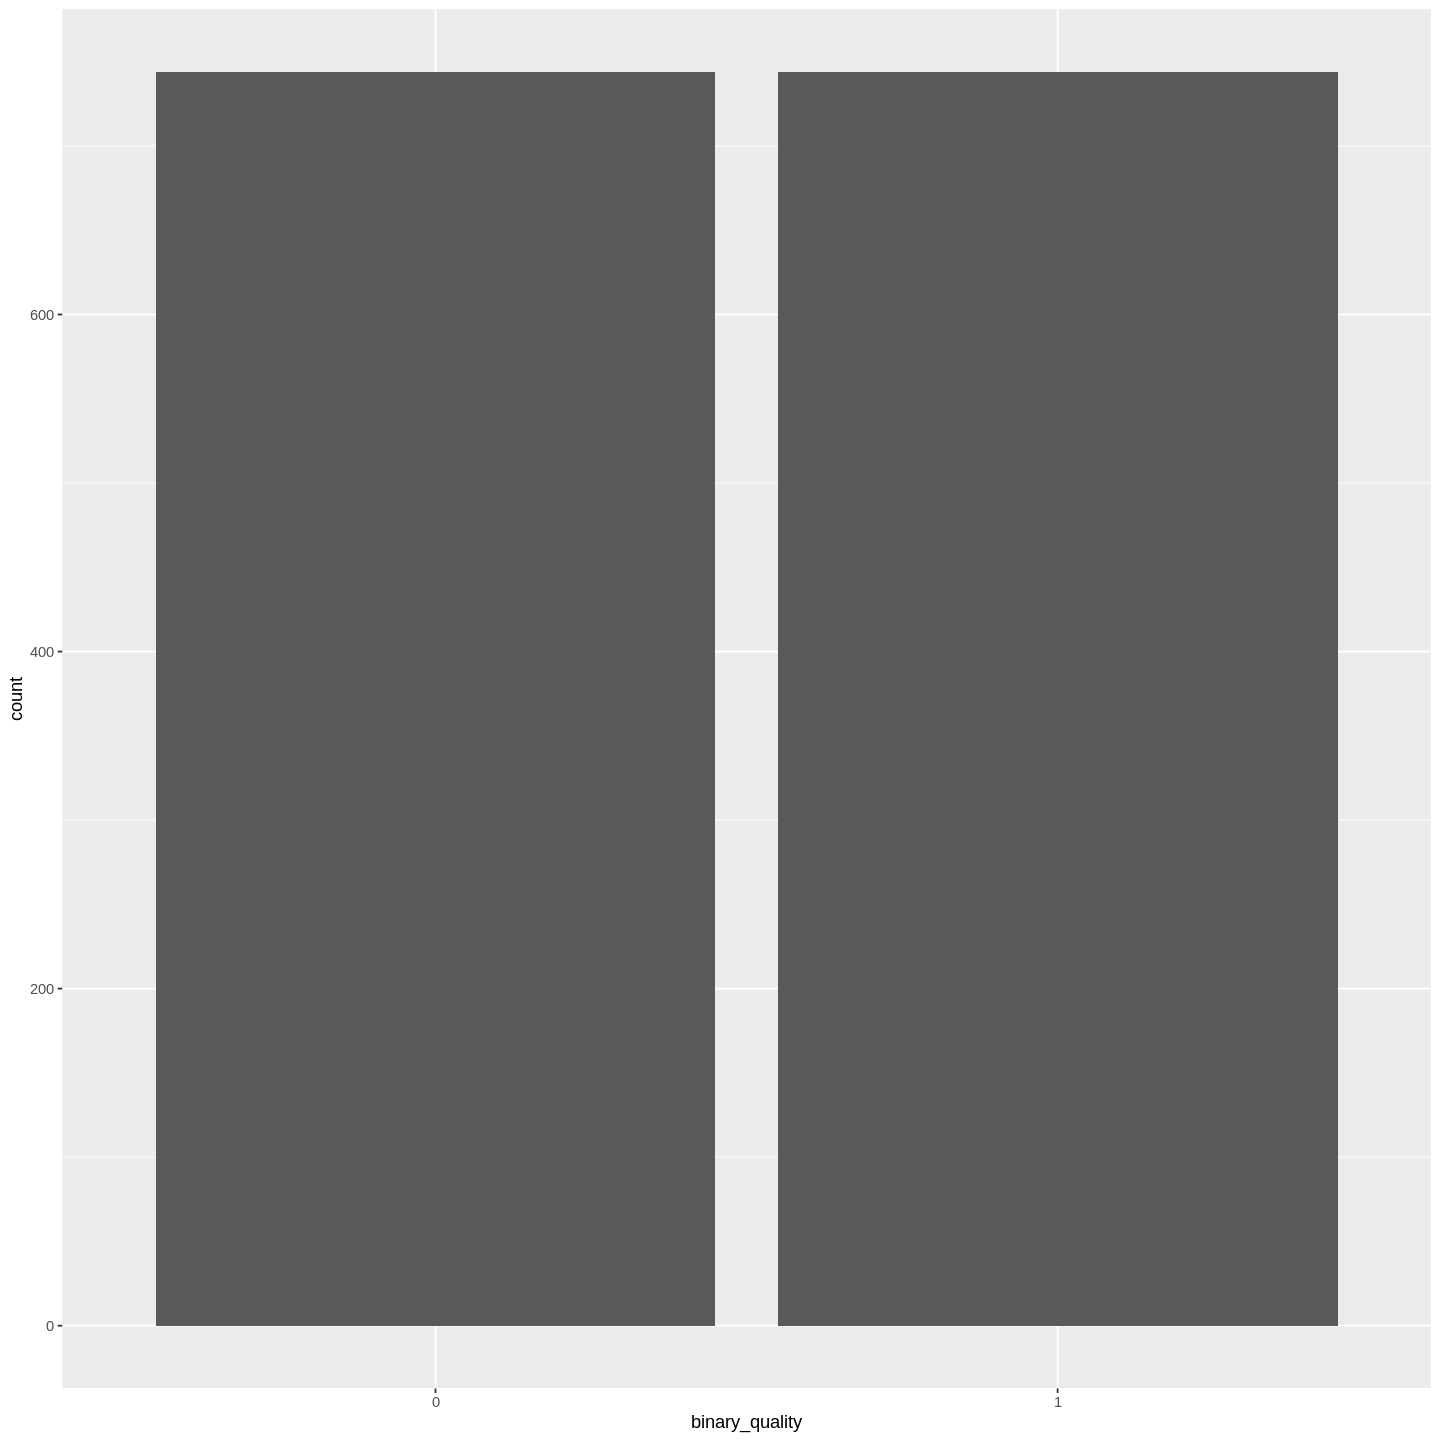

In [109]:
red_wine_plot_binary <- ggplot(red_wine_binary, aes(x=binary_quality)) + geom_histogram(binwidth=0.5, stat = "count")
red_wine_plot_binary

Now we are going to split the data into training set and testing set. And we are going to use "ggpairs()" to determine the which variables have the strongest relationship with the quality.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



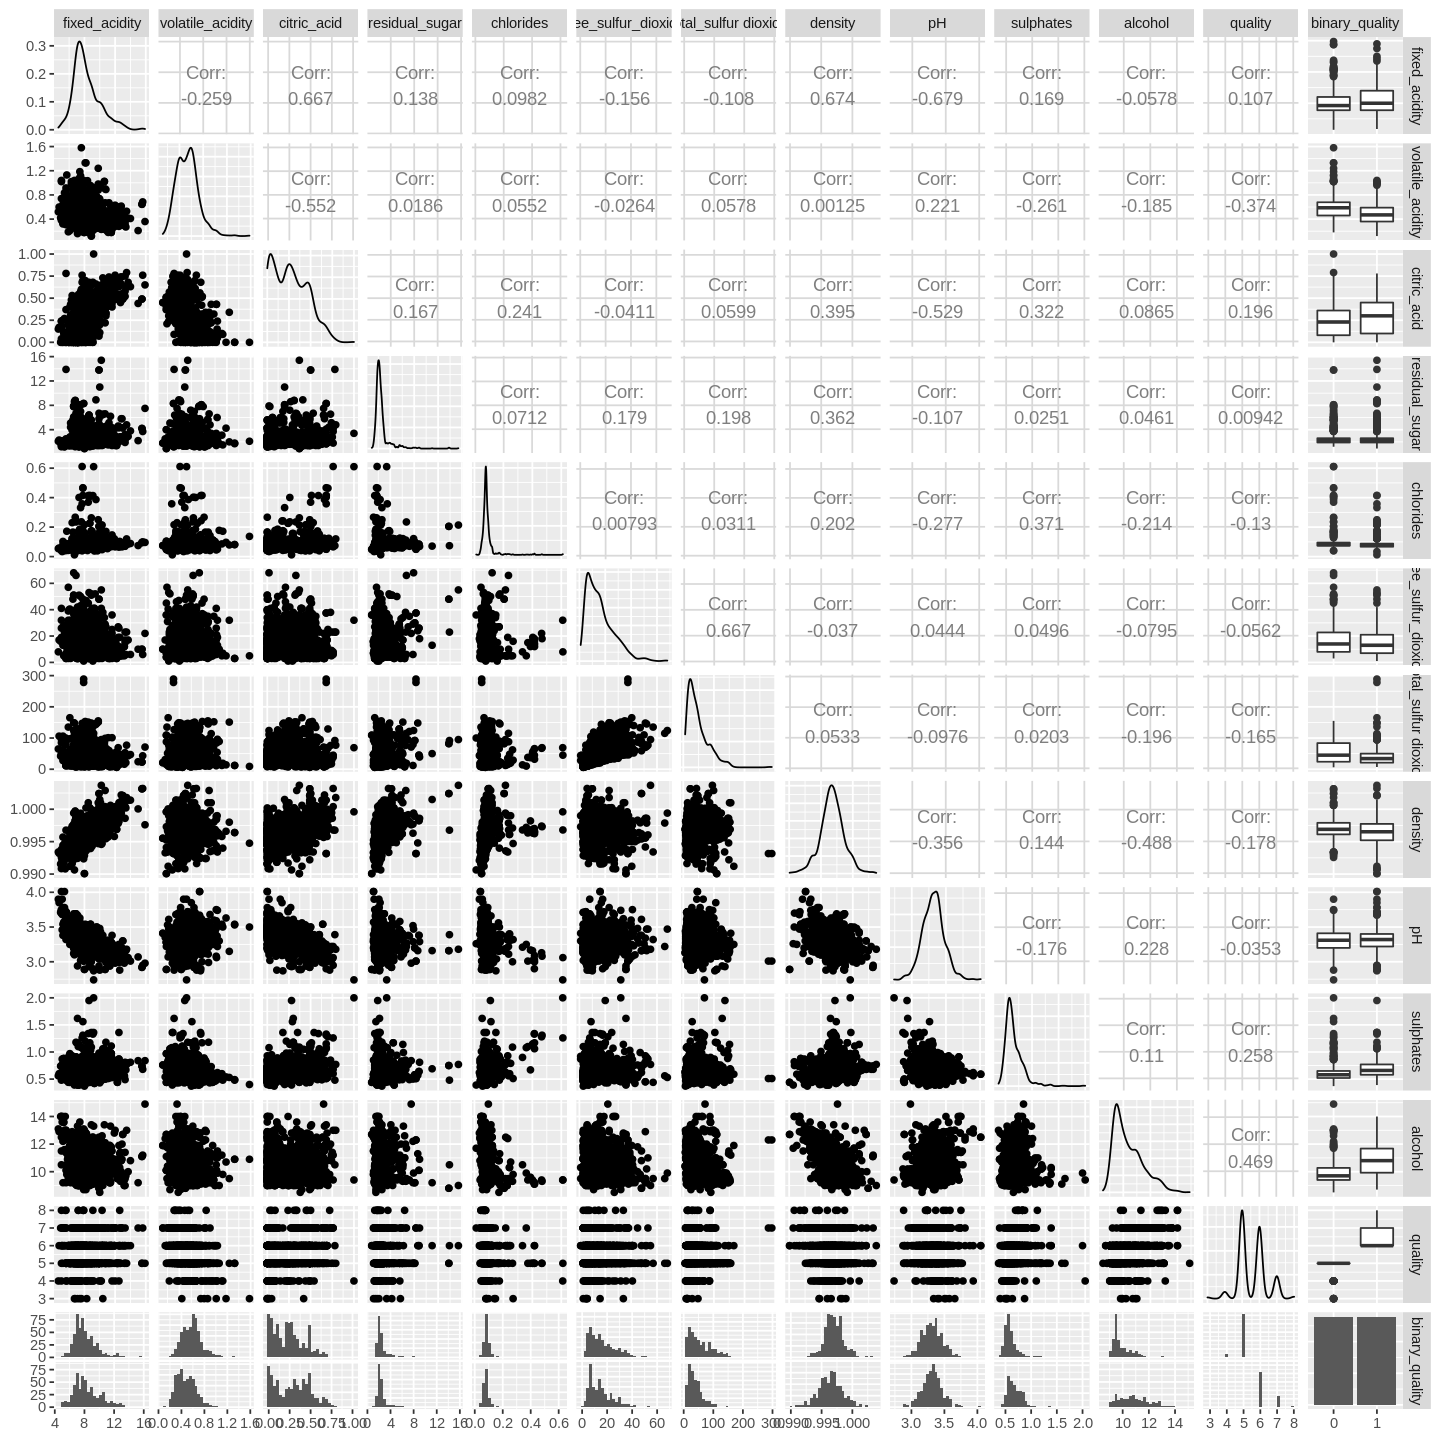

In [94]:
options(repr.plot.width = 12, repr.plot.height = 12)
set.seed(20)
wine_split <- initial_split(red_wine_binary, prop = 0.75, strata = binary_quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

wine_plot <- wine_train %>%
   ggpairs()

wine_plot

Next, we are going to draw a histogram for each variable to see how the separate distribution is in regards to the binary quality. 

[1] 1

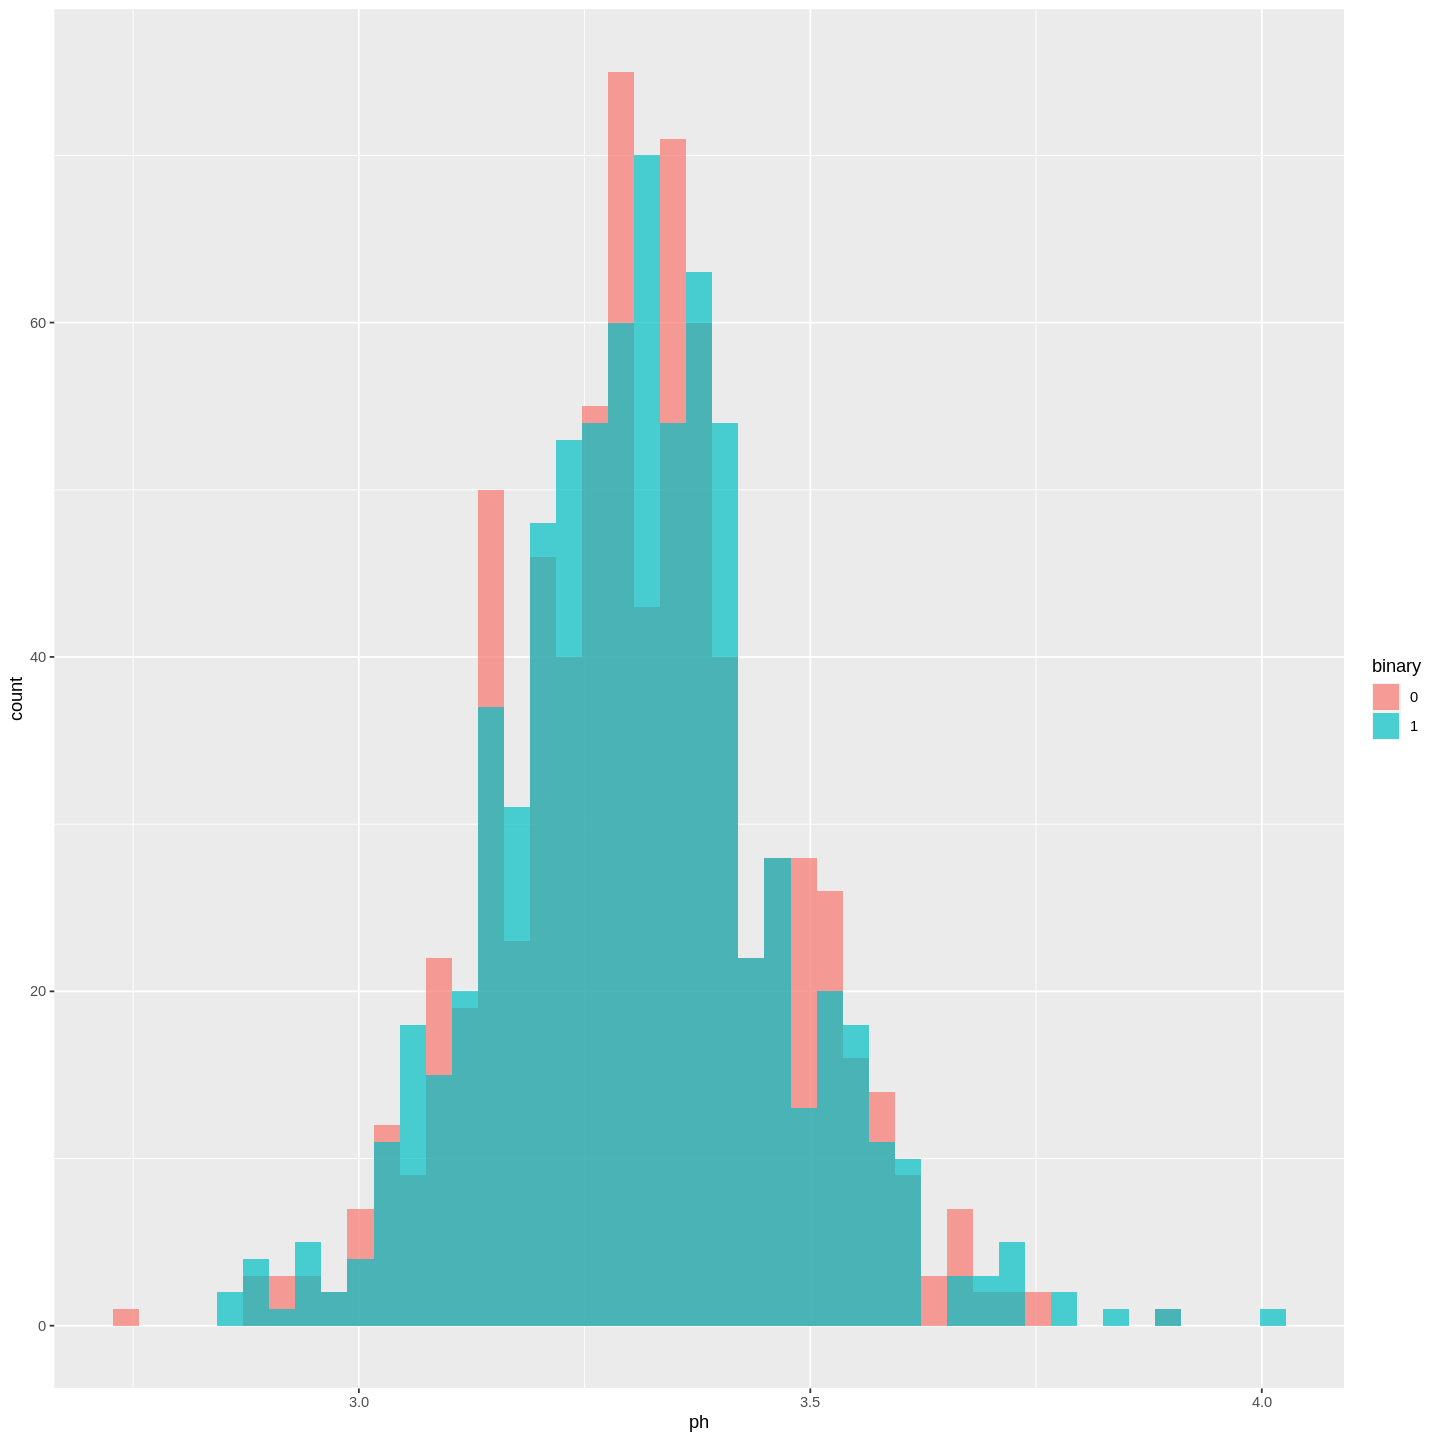

In [57]:
1
ph_hist <- red_wine_binary %>%
    ggplot(aes(x = pH, fill = binary_quality)) +
    geom_histogram(bins = 45, alpha = 0.7, position = "identity") +
    labs(x = "ph", y = "count", fill = "binary")
ph_hist

[1] 2

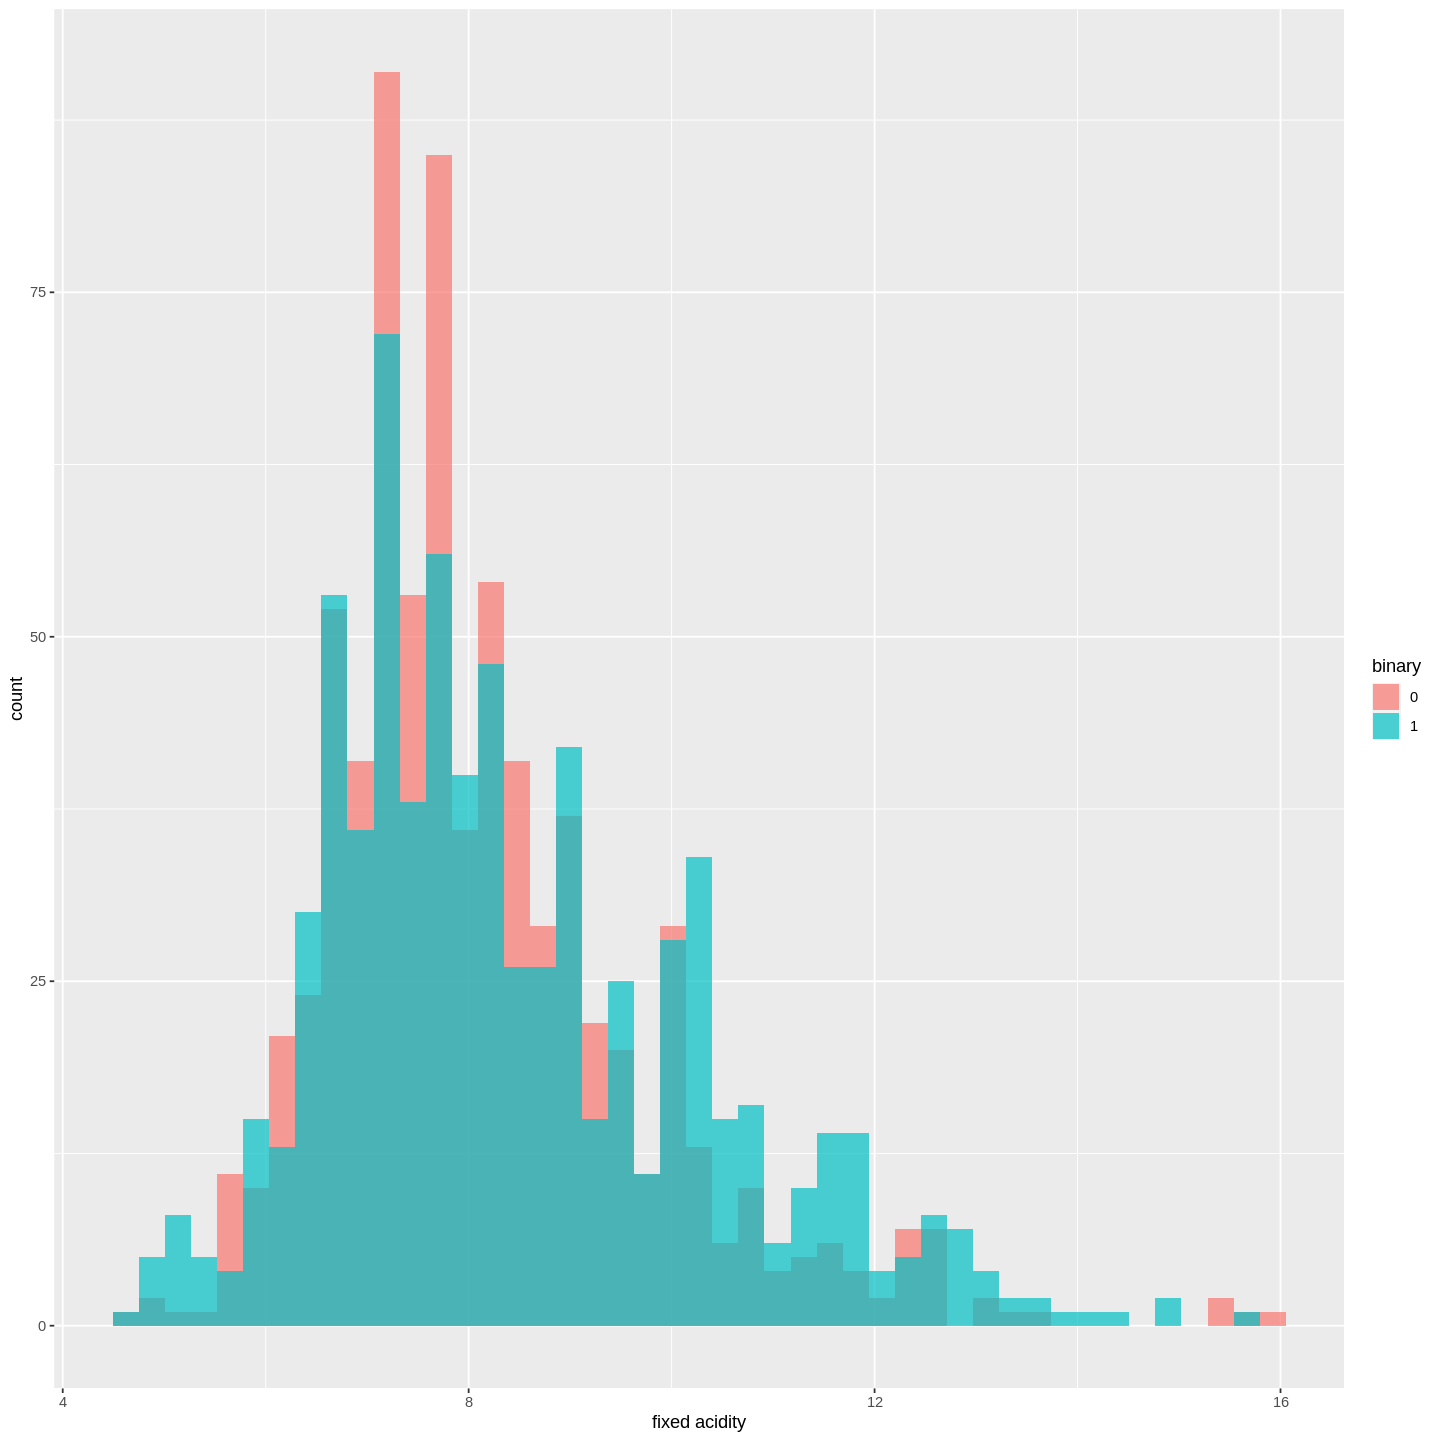

In [128]:
2
fixed_acidity_hist <- red_wine_binary %>%
    ggplot(aes(x = fixed_acidity, fill = binary_quality)) +
    geom_histogram(bins = 45, alpha = 0.7, position = "identity") +
    labs(x = "fixed acidity", y = "count", fill = "binary")
fixed_acidity_hist


[1] 3

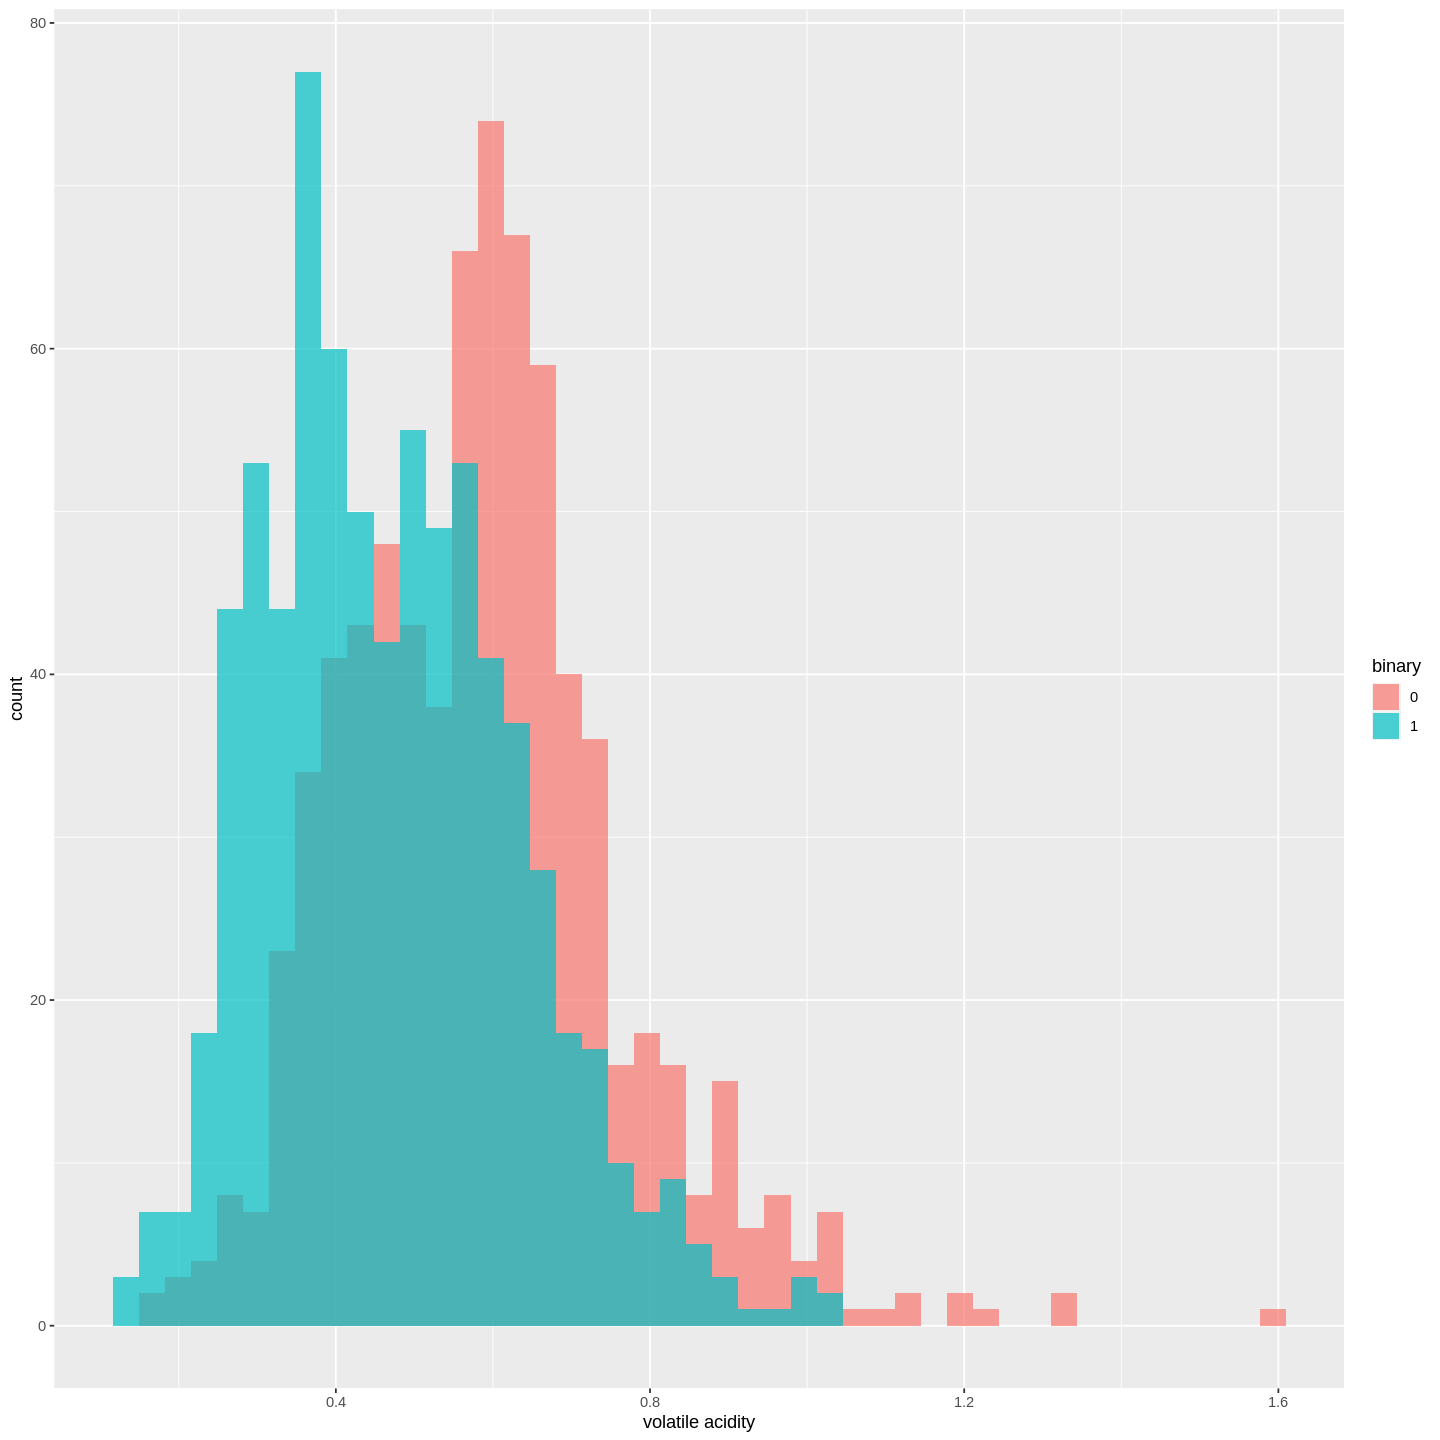

In [129]:
3
volatile_acidity_hist <- red_wine_binary %>%
    ggplot(aes(x = volatile_acidity, fill = binary_quality)) +
    geom_histogram(bins = 45, alpha = 0.7, position = "identity") +
    labs(x = "volatile acidity", y = "count", fill = "binary")
volatile_acidity_hist 



[1] 4

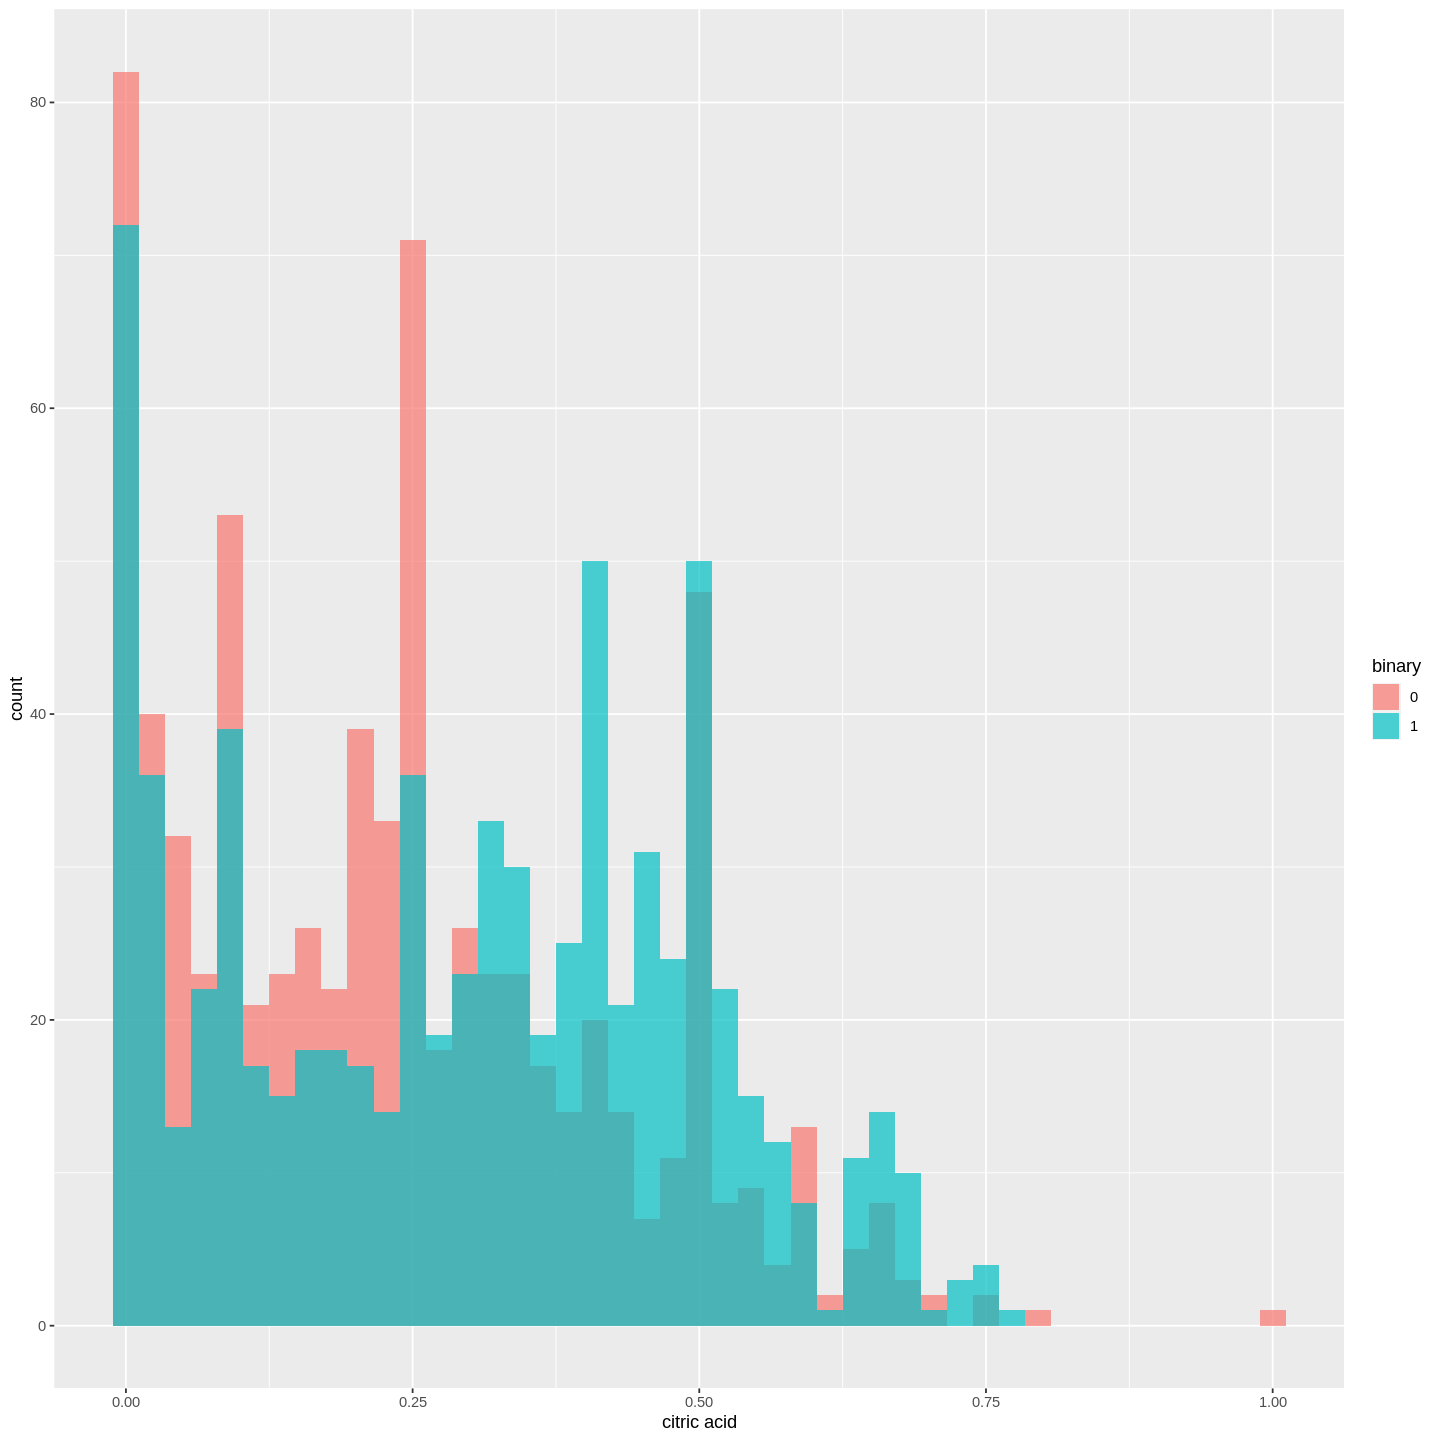

In [130]:
4
citric_acid_hist <- red_wine_binary %>%
    ggplot(aes(x = citric_acid, fill = binary_quality)) +
    geom_histogram(bins = 45, alpha = 0.7, position = "identity") +
    labs(x = "citric acid", y = "count", fill = "binary")
citric_acid_hist



[1] 5

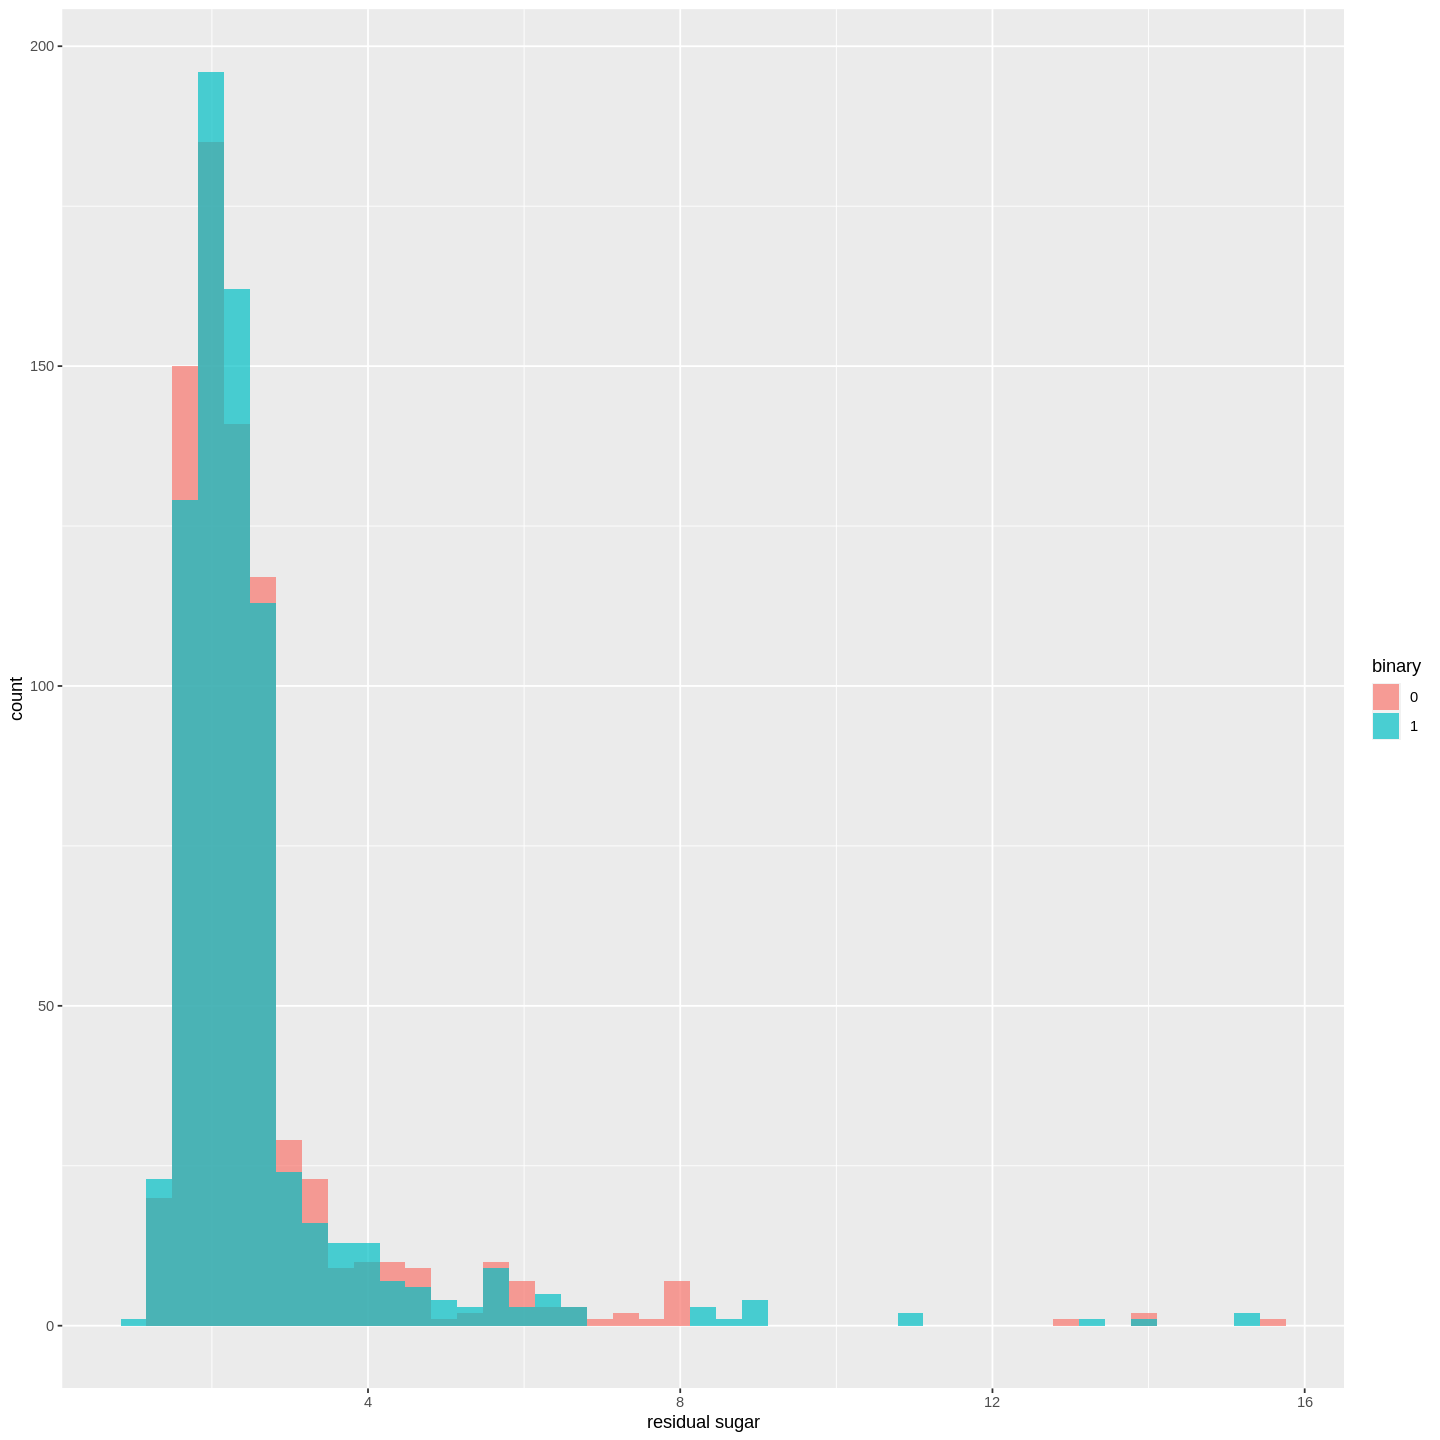

In [131]:
5
residual_sugar_hist <- red_wine_binary %>%
    ggplot(aes(x = residual_sugar, fill = binary_quality)) +
    geom_histogram(bins = 45, alpha = 0.7, position = "identity") +
    labs(x = "residual sugar", y = "count", fill = "binary")
residual_sugar_hist



[1] 6

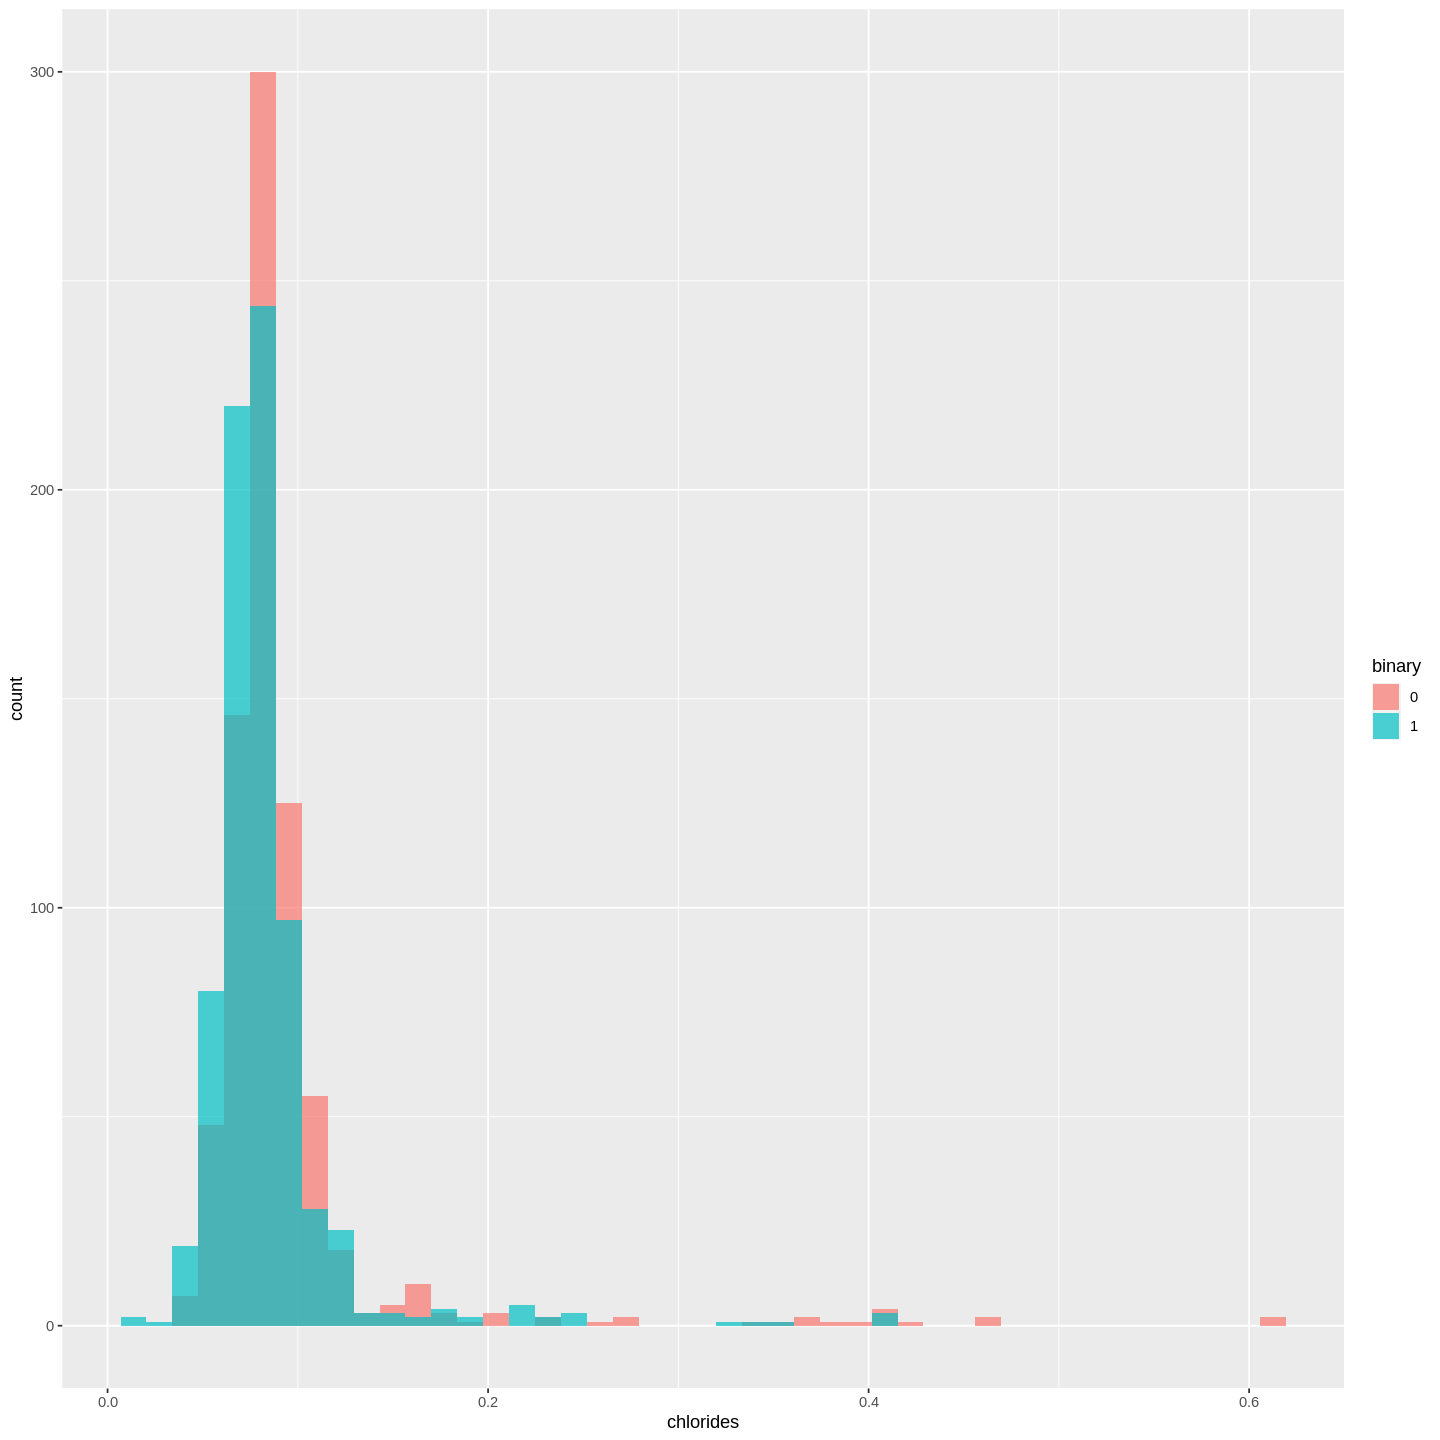

In [62]:
6
chlorides_hist <- red_wine_binary %>%
    ggplot(aes(x = chlorides, fill = binary_quality)) +
    geom_histogram(bins = 45, alpha = 0.7, position = "identity") +
    labs(x = "chlorides", y = "count", fill = "binary")
chlorides_hist



[1] 7

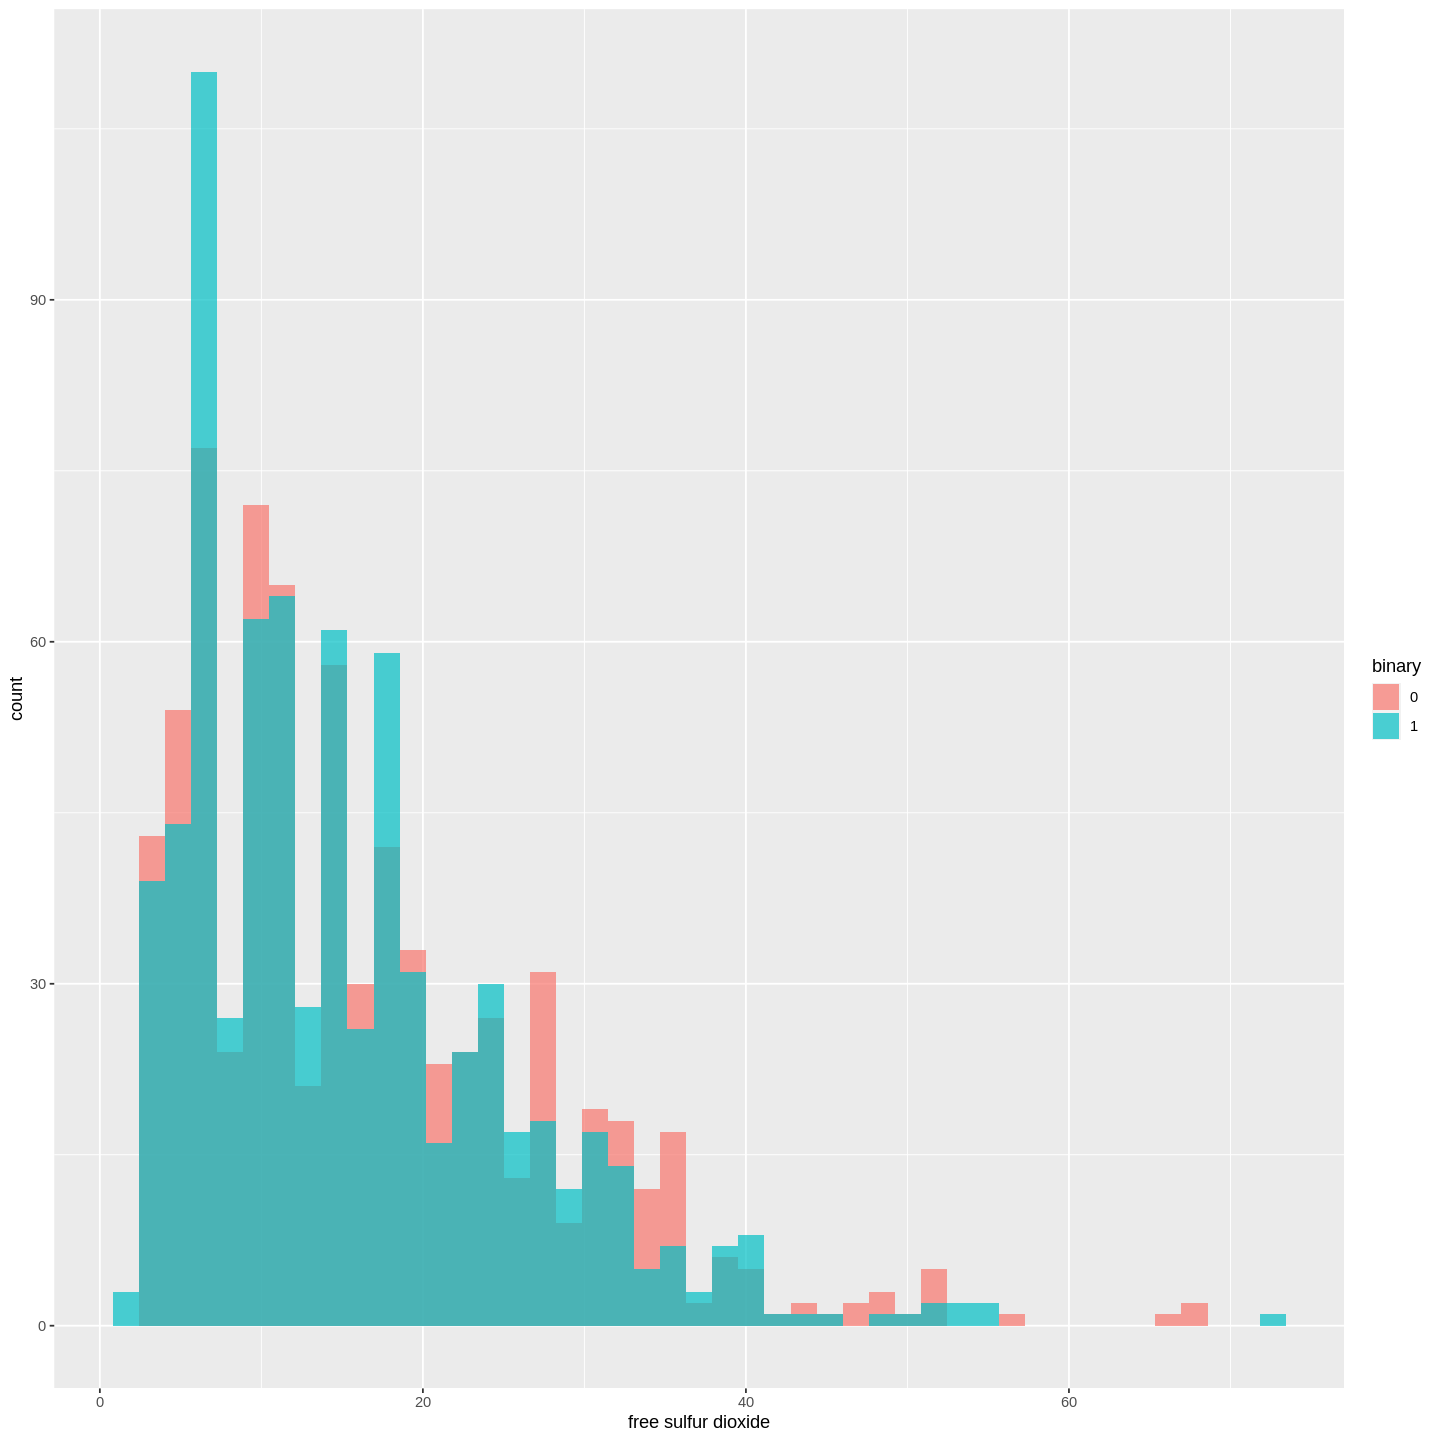

In [132]:
7
free_sulfur_dioxide_hist <- red_wine_binary %>%
    ggplot(aes(x = free_sulfur_dioxide, fill = binary_quality)) +
    geom_histogram(bins = 45, alpha = 0.7, position = "identity") +
    labs(x = "free sulfur dioxide", y = "count", fill = "binary")
free_sulfur_dioxide_hist



[1] 8

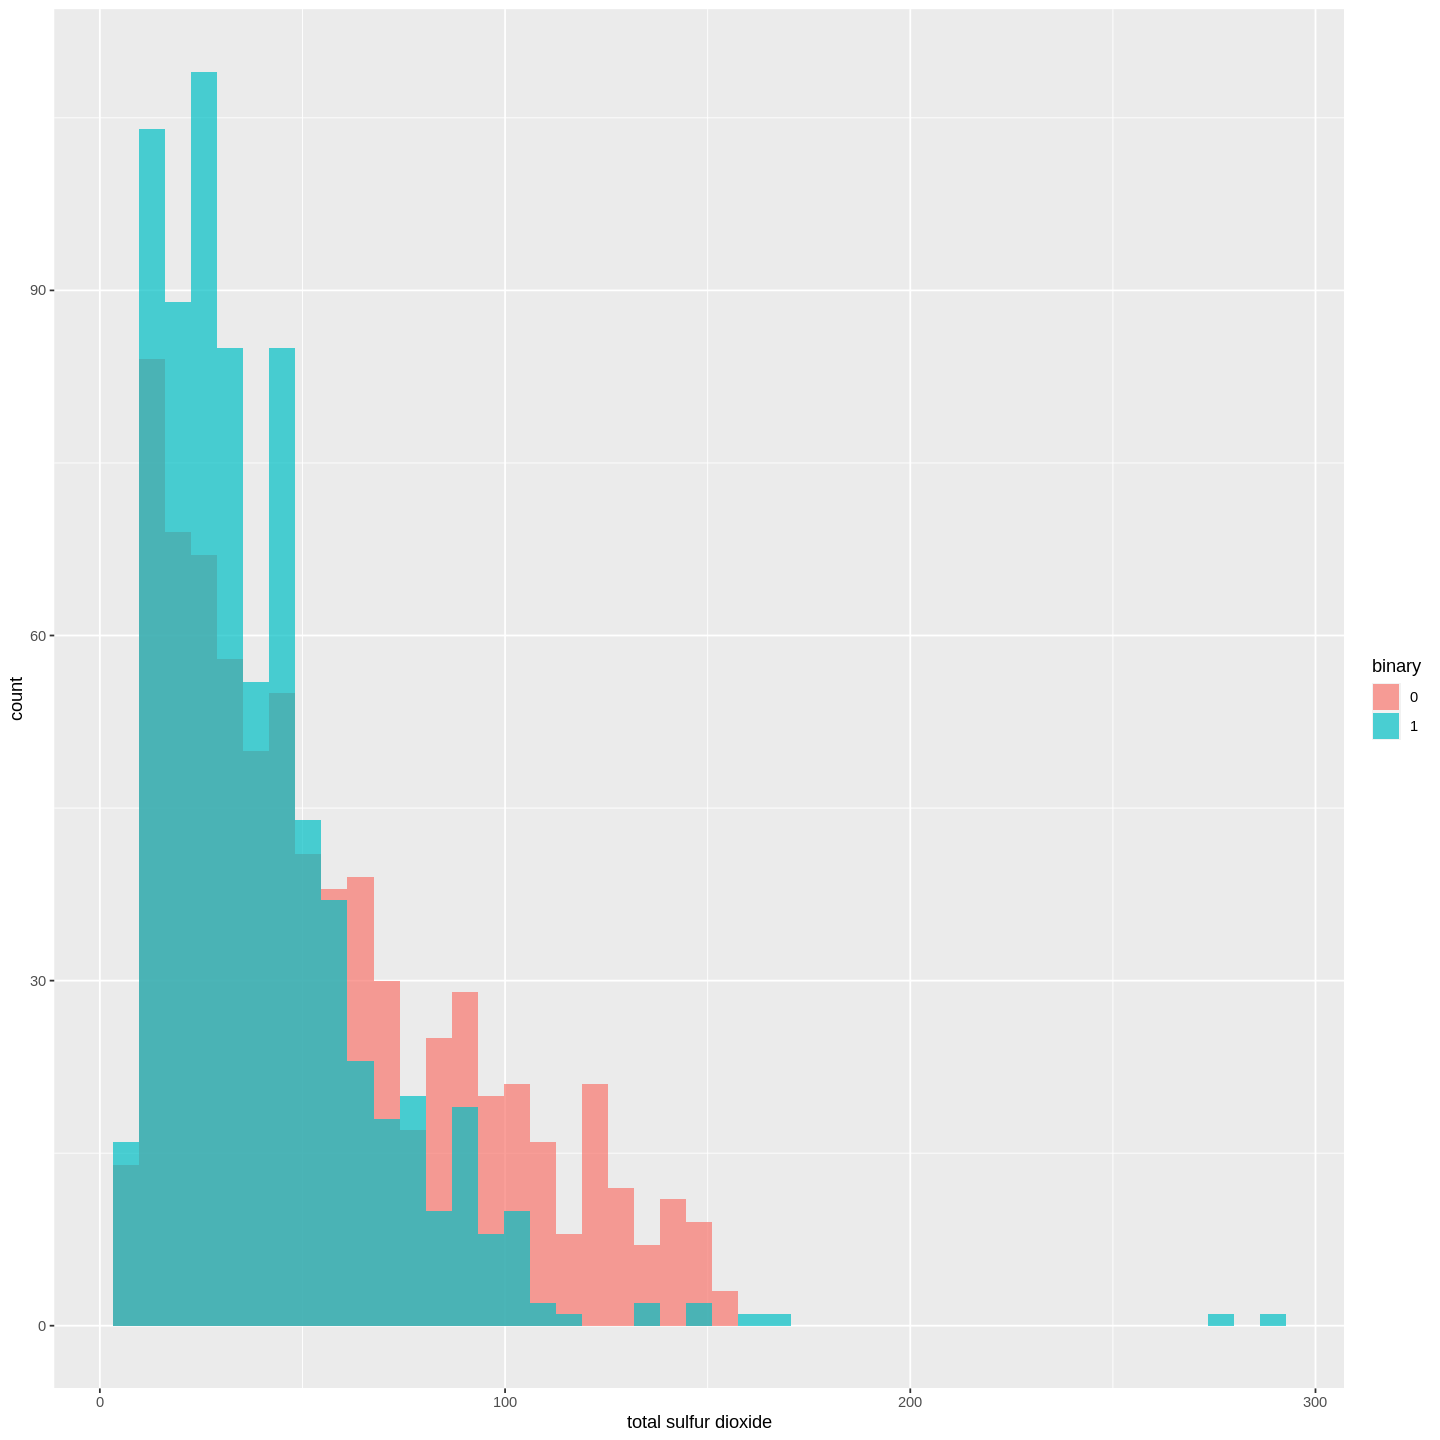

In [133]:
8
total_sulfur_dioxide_hist <- red_wine_binary %>%
    ggplot(aes(x = `total_sulfur dioxide`, fill = binary_quality)) +
    geom_histogram(bins = 45, alpha = 0.7, position = "identity") +
    labs(x = "total sulfur dioxide", y = "count", fill = "binary")
total_sulfur_dioxide_hist



[1] 9

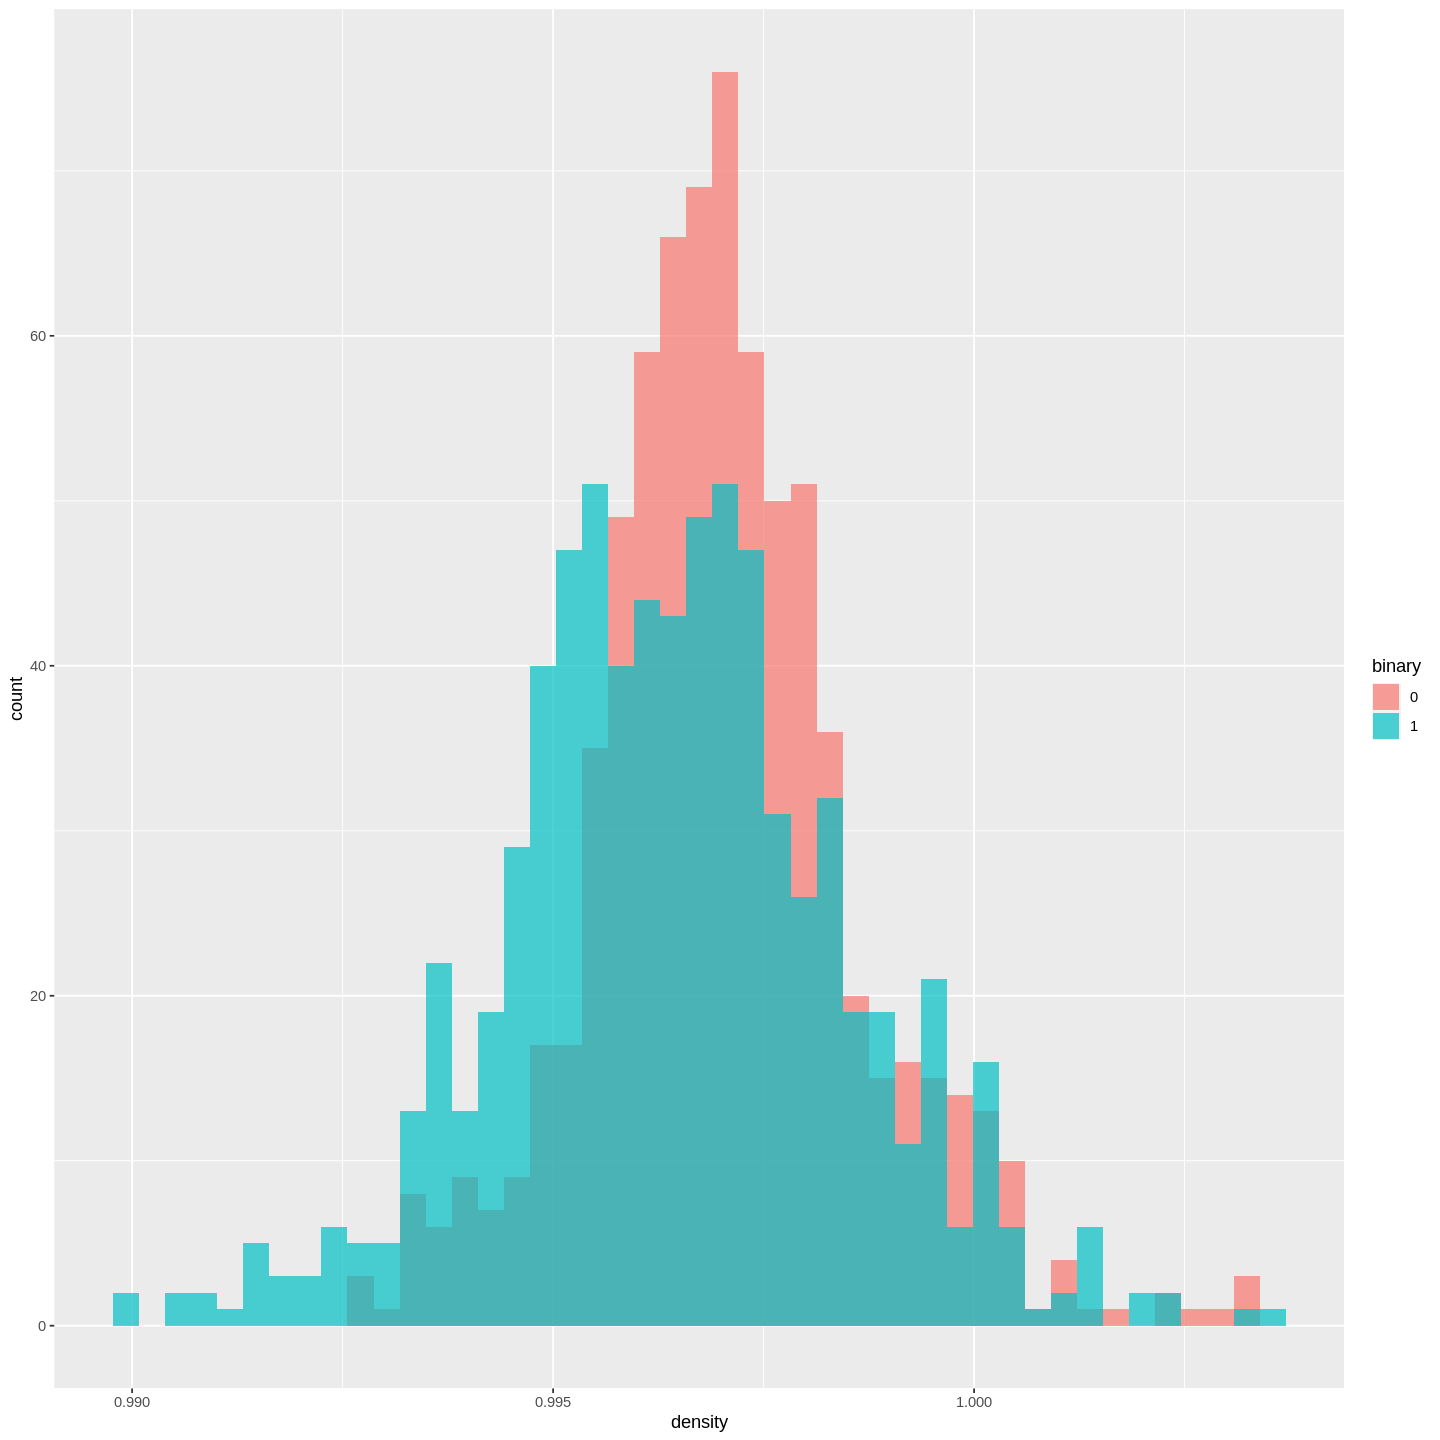

In [65]:
9
density_hist <- red_wine_binary %>%
    ggplot(aes(x = density, fill = binary_quality)) +
    geom_histogram(bins = 45, alpha = 0.7, position = "identity") +
    labs(x = "density", y = "count", fill = "binary")
density_hist


[1] 10

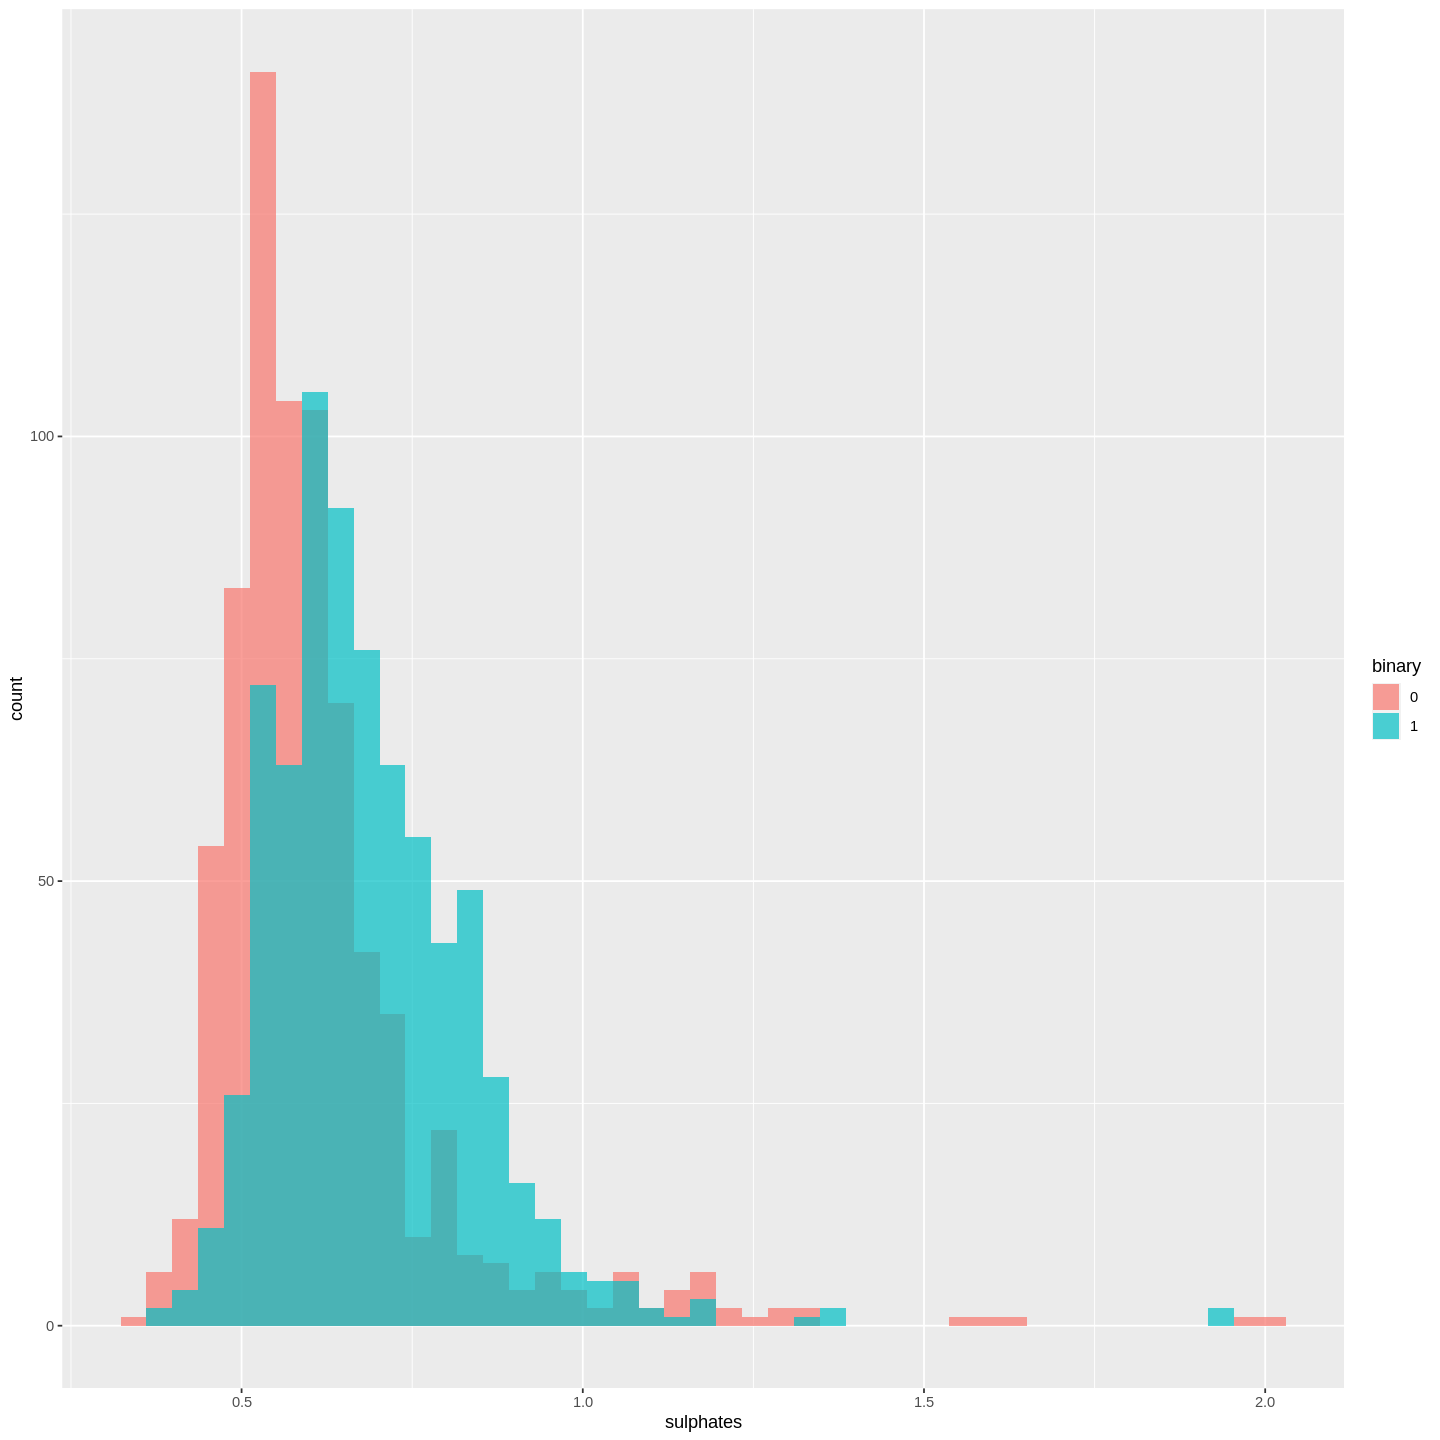

In [66]:
10
sulphates_hist <- red_wine_binary %>%
    ggplot(aes(x = sulphates, fill = binary_quality)) +
    geom_histogram(bins = 45, alpha = 0.7, position = "identity") +
    labs(x = "sulphates", y = "count", fill = "binary")
sulphates_hist



[1] 11

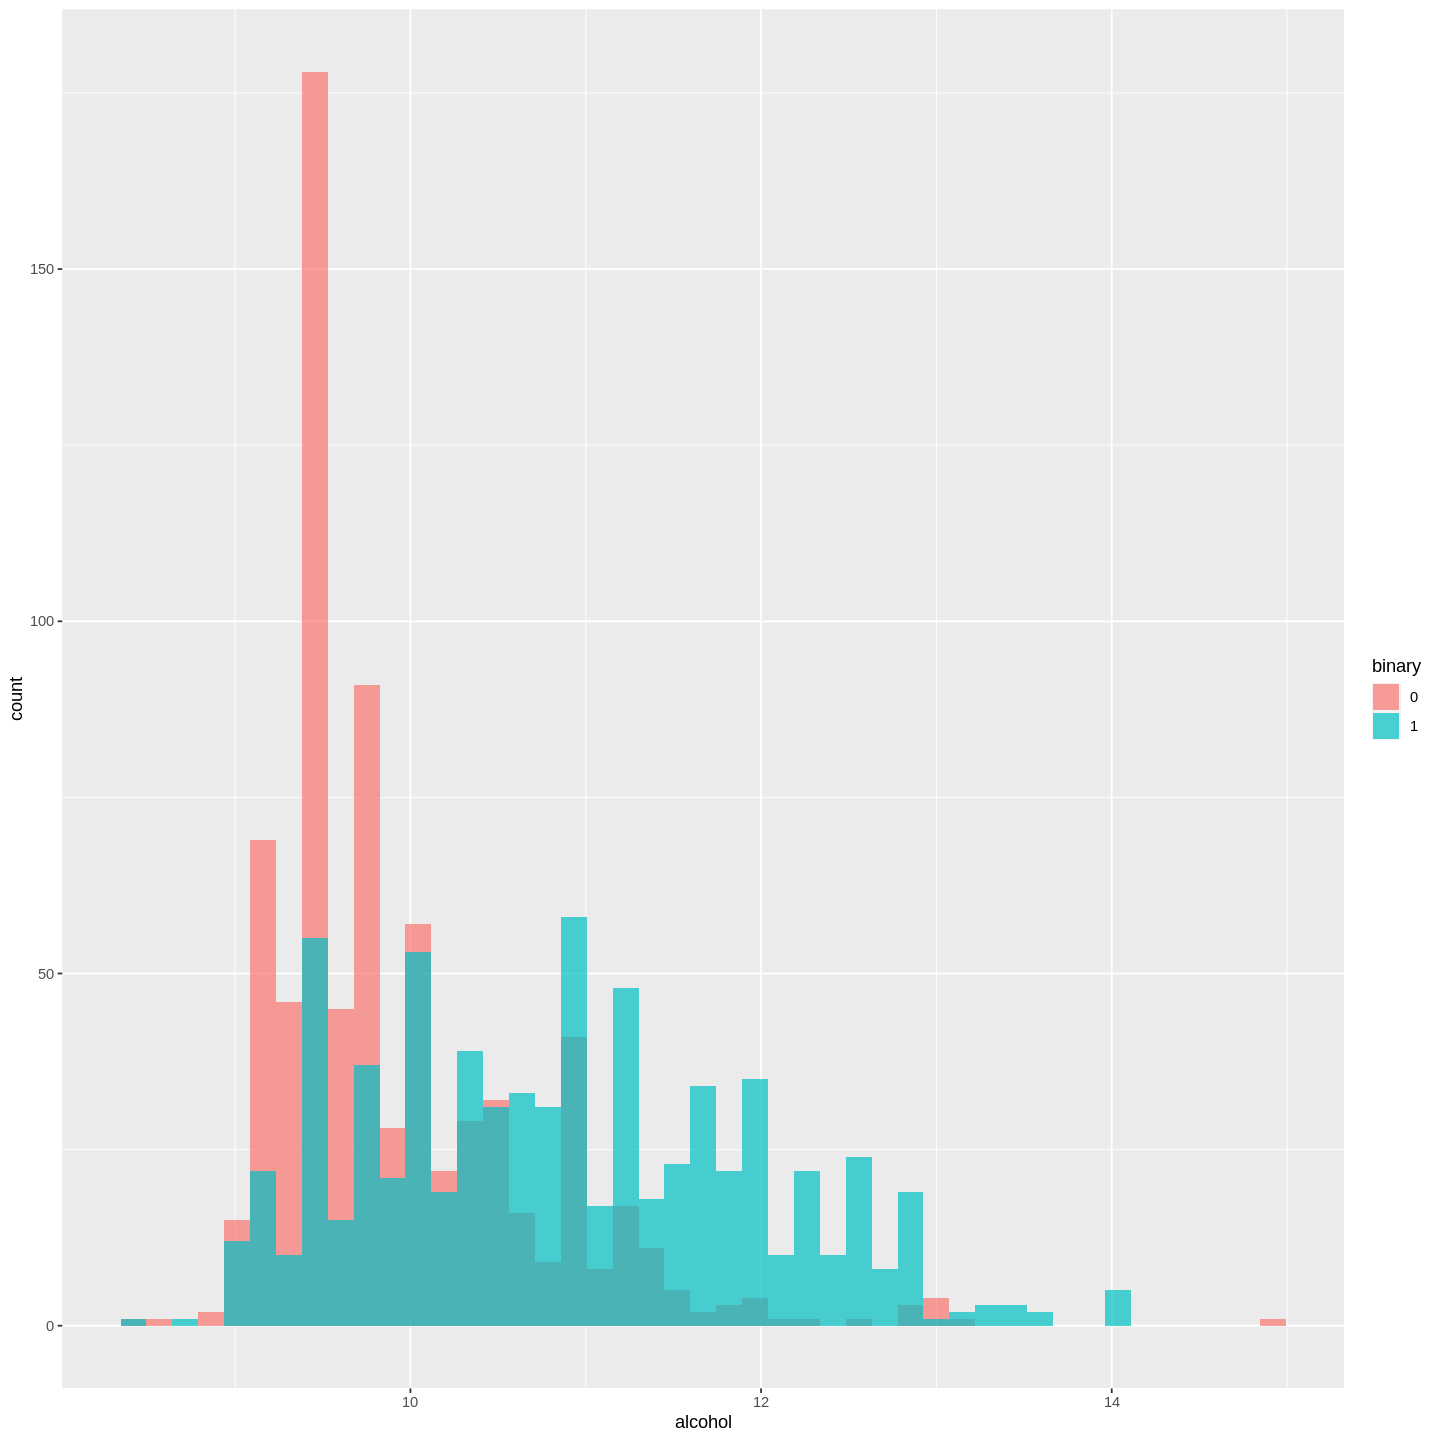

In [134]:
11
alcohol_hist <- red_wine_binary %>%
    ggplot(aes(x = alcohol, fill = binary_quality)) +
    geom_histogram(bins = 45, alpha = 0.7, position = "identity") +
    labs(x = "alcohol", y = "count", fill = "binary")
alcohol_hist

Combining the results from the ggpairs plot and the histogram, we found 4 variables that have the strongest relationship with the quality. They are **alcohol**, **sulphates**, **volatile acidity** and **citric acid**. Thus, we decide to include all 4 variables into our knn model. 

Next, we are going to draw the scatterplot between these variables to visualize their relationship with the binary quality.

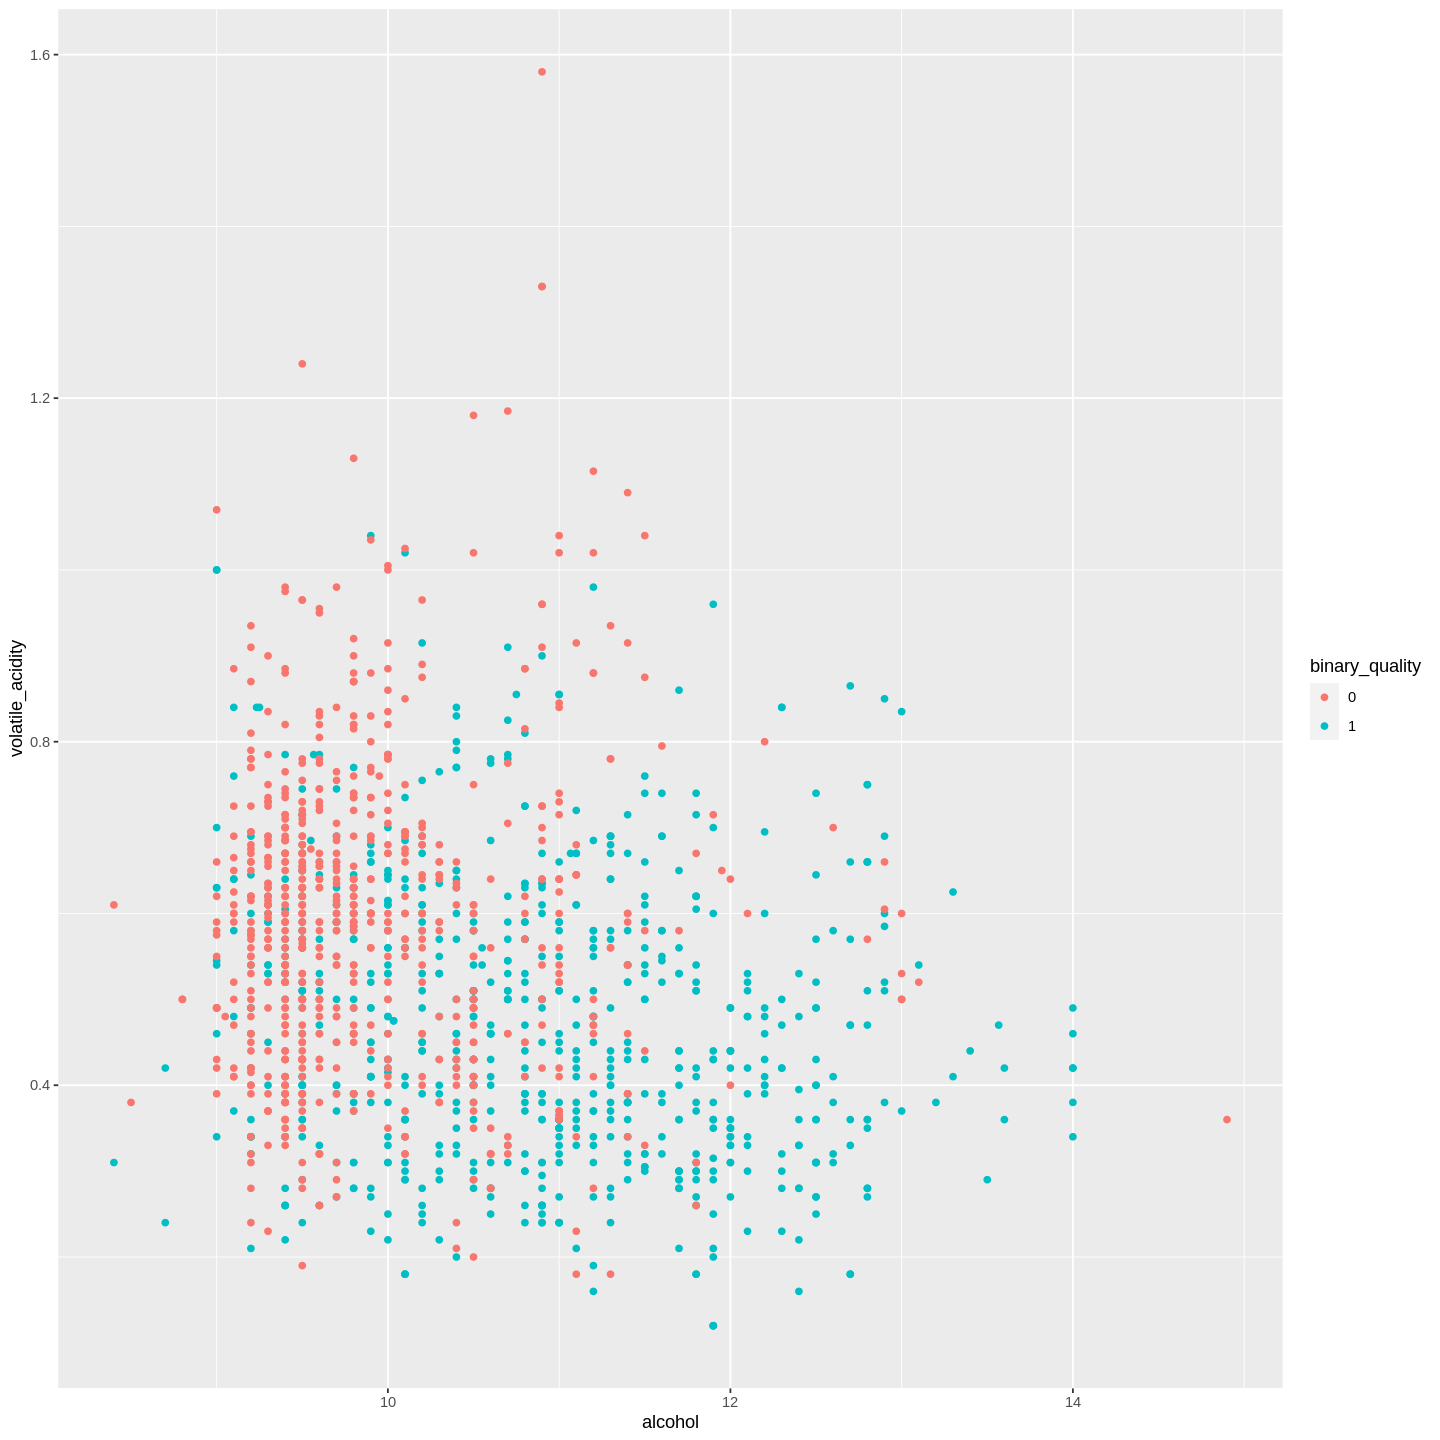

In [68]:
ggplot(red_wine_binary, aes(x = alcohol, y = volatile_acidity, color = binary_quality))+
geom_point()

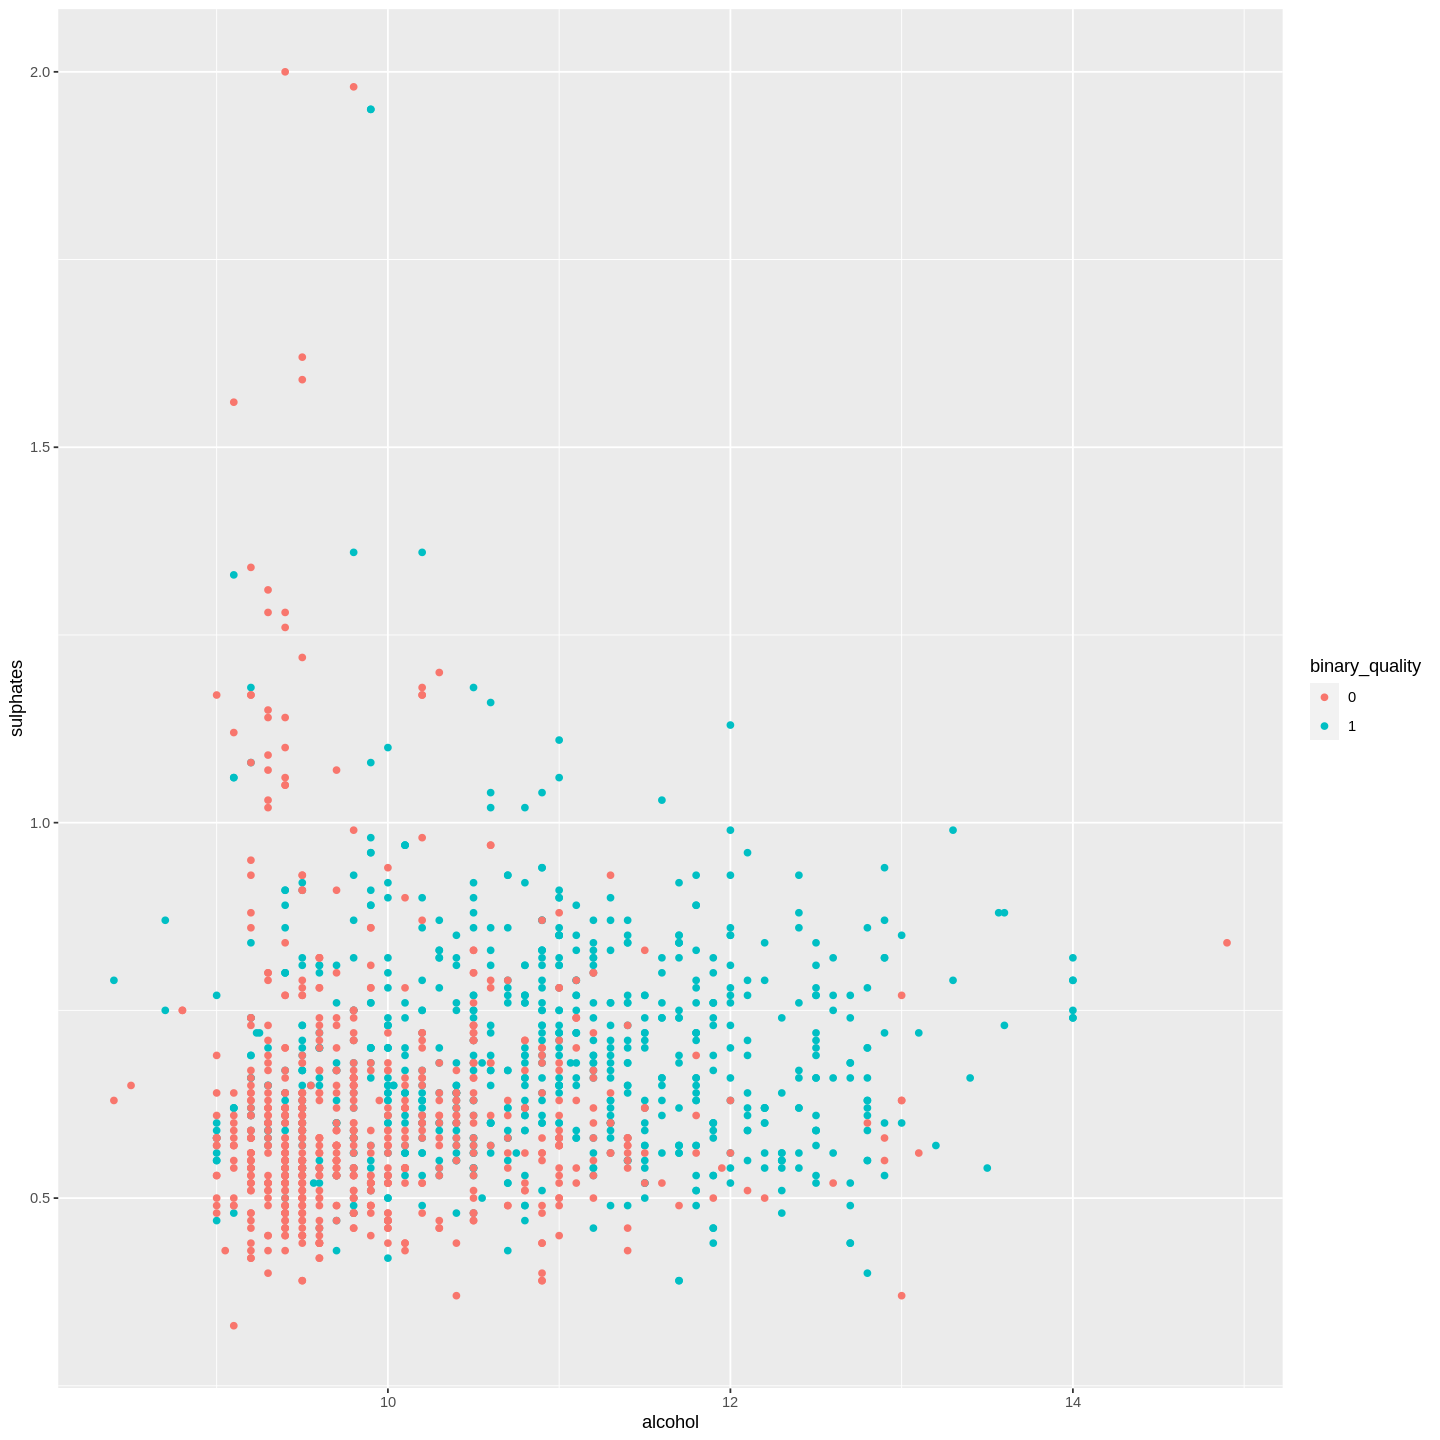

In [69]:
ggplot(red_wine_binary, aes(x = alcohol, y = sulphates, color = binary_quality))+
geom_point()

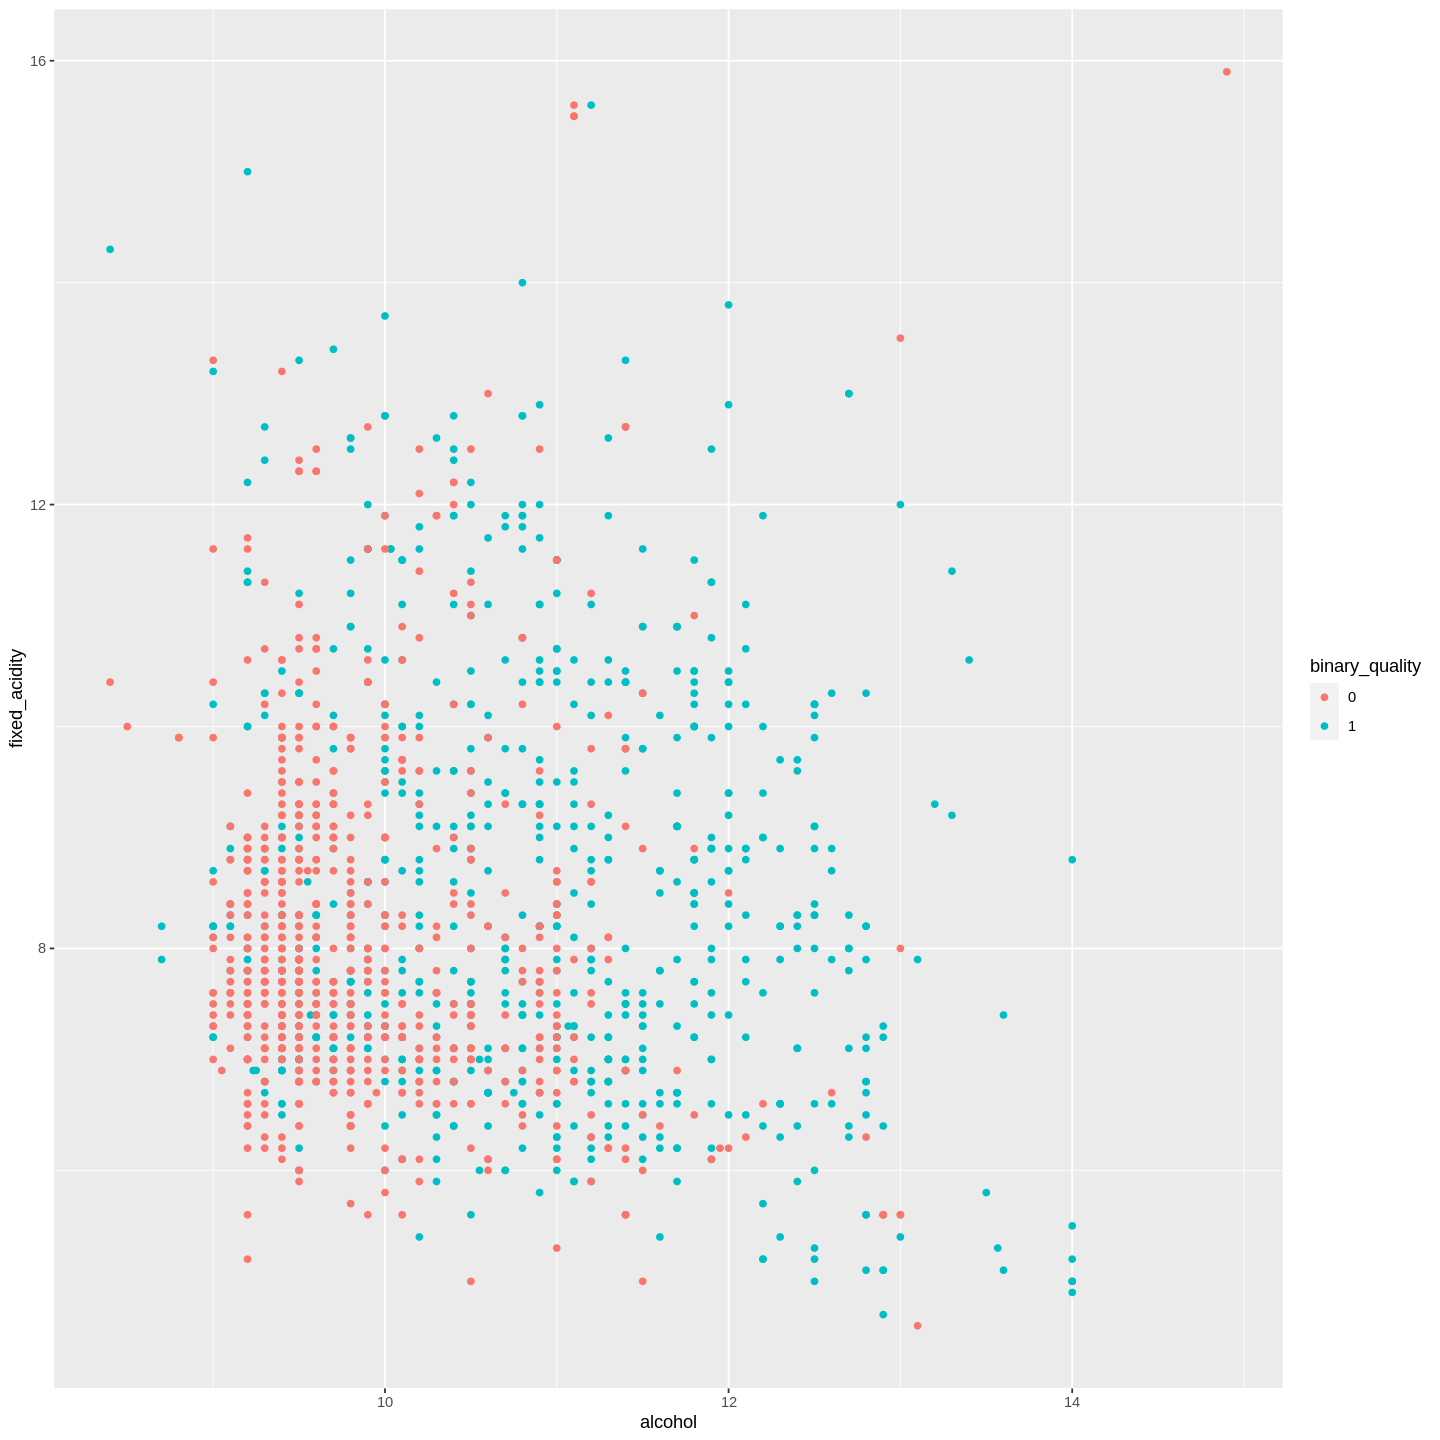

In [70]:
ggplot(red_wine_binary, aes(x = alcohol, y = fixed_acidity, color = binary_quality))+
geom_point()

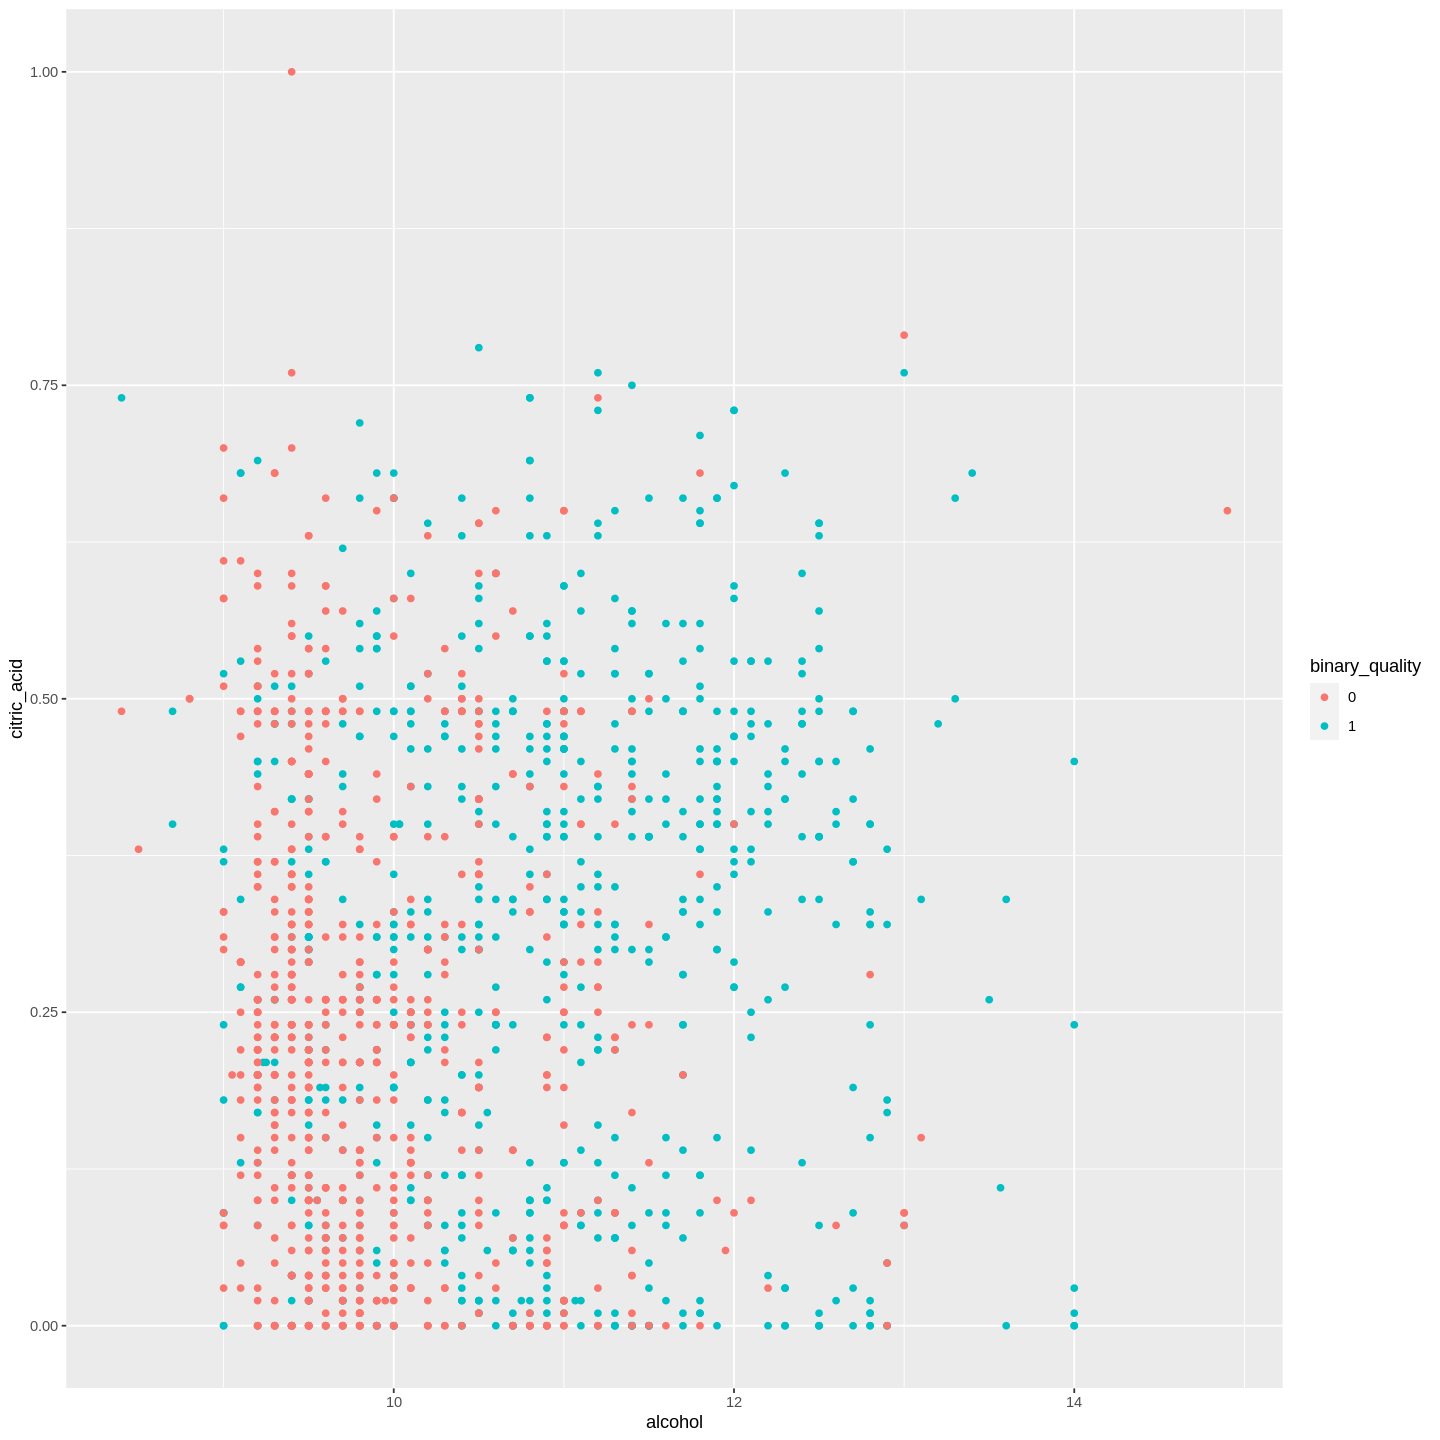

In [71]:
ggplot(red_wine_binary, aes(x = alcohol, y = citric_acid, color = binary_quality))+
geom_point()

In [89]:
red_wine_recipe <- recipe(binary_quality ~ volatile_acidity + alcohol + citric_acid + sulphates, data = wine_train)%>%
step_scale(all_predictors())%>%
step_center(all_predictors())
red_wine_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()